![heart.gif](attachment:heart.gif)

# <center> Cardiac Rehabilitation Plan Prediction </center>

## <center>  **Jenifer Mayang Jues** </center>
## <center> **S2016572** </cemter>


## Introduction

Cardiovascular disease (CVD) have been the leading cause of death globally. In 2021, 20.5 million people died from a cardiovascular condition (Tsao et al., 2022).Cardiac Rehabilitation (CR) is a promising emerging multidiscipline treatment to improve cardiovascular health after experiencing heart attack or those who underwent cardiac procedure or surgery. Cardiac Rehabilitation increases survival rates up to 35% after a heart attack or bypass surgery (CDC, 2021). Participation and completion of CR programs by eligible patients remain low. 50–70% of patients eligible for CR do not attend CR and 30–60% do not complete CR session (Chindhy et al., 2020).The most suitable rehabilitation  programs for each patient depends on various factors such as health condition and resources.Utilizing machine learning techniques to uncover  relevant information may help to make more targeted and personalized CR program

## Problem Statement

There are numerous prior studies have employed data mining techniques to identify crucial predictors for cardiac rehabilitation participation, completion, and outcomes. However, there remains a notable gap in leveraging these insights for the optimization and personalization of cardiac rehab programs (Su et al., 2022)

Apart from that, there are abundance of features related to cardiac rehabilitation. For instance, a previous study by Lofaro et al., 2016, able to achieve high accuracy at 0.93 by utilizing 17 features. Despite the high performance, harnessing these features effectively for machine learning predictions poses a challenge as it may lead to overfitting. Additionally, there is no feature selection technique that has been incorporated in previous CR recommendation studies. Hence, there is a necessity to employ feature selection techniques to identify the most influential predictor. 

Besides, a latest study by Van Tuijin et al. (2023)  only rely on self-generated data to assess their model instead of authentic cardiac rehabilitation patient data. This may pose challenges in implementing findings on cardiac rehabilitation scenarios in the real world

## Research Objective


1. To identify relevant features that contribute to cardiac rehabilitation recommendation plan.


2. To evaluate the performance of machine learning models in predicting cardiac rehabilitation recommendation plan.


3. To identify the best machine learning model in predicting cardiac rehabilitation recommendation plan.

In [93]:
!pip install pandas openpyxl
!pip install tabulate

In [94]:
from tabulate import tabulate

#Insert data
data = [
    ["Data Source", "Period", "Number of Sample,N", "DataType", "Total of Attributes"],
    ["Clinical Data of cardiac rehabilitation patients at the Department of Rehabilitation Medicine, University of Malaya Medical Centre", "2018 - 2020", 130, "Patients Demographic Info, Patient's Medical History, Cardiac Rehab Recommendation, Cardiac Rehab Evaluation", 95]
]
    
#Transpose data
transposed_data=list(zip(*data))
    
#Display table
table_data = tabulate(transposed_data, headers="firstrow", tablefmt="plain")
print(table_data)


Data Source          Clinical Data of cardiac rehabilitation patients at the Department of Rehabilitation Medicine, University of Malaya Medical Centre
Period               2018 - 2020
Number of Sample,N   130
DataType             Patients Demographic Info, Patient's Medical History, Cardiac Rehab Recommendation, Cardiac Rehab Evaluation
Total of Attributes  95


In [95]:
import os
os.getcwd()
os.chdir('C:\\Users\\User\\Documents\\University of Malaya\\SEM 4\\MDS Project 2')

In [96]:
os.getcwd()

'C:\\Users\\User\\Documents\\University of Malaya\\SEM 4\\MDS Project 2'

## 1. Data Load: Load cardiac rehab dataset

There are three types of dataset which are **PreStress**, **Evaluation**, **Info** and **Recommendation** datasets.


In [97]:
#Import and load datasets

import numpy as np
import pandas as pd
df1= pd.read_csv("Processed_PreStress_2019.csv")
df2= pd.read_csv("Processed_PreStress_2020.csv")
df3= pd.read_csv("Processed_PT1_2019_Evaluation.csv")
df4= pd.read_csv("Processed_PT1_2020_Evaluation.csv")
df5= pd.read_csv("Processed_PT1_2019_Info.csv")
df6= pd.read_csv("Processed_PT1_2020_info.csv")
df7= pd.read_csv("Processed_PT1_2019_Recommendation.csv")
df8= pd.read_csv("Processed_PT1_2020_Recommendation.csv")
df9= pd.read_csv("Processed-PreStress-2018.csv")
df10= pd.read_csv("Processed-PT1-2018-Evaluation.csv")
df11= pd.read_csv("Processed-PT1-2018-Info.csv")
df12= pd.read_csv("Processed-PT1-2018-Recommendation.csv")

###  Merging data

Merging all CRP datasets in 2018, 2019 and 2020 to create a new dataset.

<span style="color:blue">i. PreStress Dataset </span>

In [98]:
import pandas as pd

PreStress_df=pd.DataFrame(pd.concat([df1, df2, df9], axis=0))

<span style="color:blue">ii. Evaluation Dataset </span>

This dataset provides information on post cardiac rehabilitation evaluation

In [99]:
import pandas as pd

Evaluation_df=pd.DataFrame(pd.concat([df3, df4, df10], axis=0))

<span style="color:blue">iii. Info Dataset </span>

This dataset provides information on patient's past medical history, intervention, exercise habit, lifestyle and environment

In [100]:
import pandas as pd
Info_df=pd.DataFrame(pd.concat([df5, df6, df11], axis=0))

<span style="color:blue">iv. Recommendation Dataset </span>

This dataset provides information on recommended cardiac rehabilitation program and exercise activities

In [101]:
import pandas as pd

Recommendation_df=pd.DataFrame(pd.concat([df7, df8, df12], axis=0))

In [102]:
### Combining all the datasets into a dataframe

CRP_List = [PreStress_df, Info_df, Evaluation_df, Recommendation_df]
CRP_df = pd.concat(CRP_List, axis=1)
CRP_df.head()

,PatientID,Risk Factor - HPT,Risk Factor - DM,Risk Factor - HPL,Risk Factor - Family hx,Risk Factor - Exercise,Risk Factor - Stress,Risk Factor - Smoking,Risk Factor - Diet,Risk Factor - BMI,...,Target HR,Additional,Stretching Exercise,Recumbent bike : RES,Recumbent bike : Duration,Recumbent bike : MHR,Recumbent bike : RPE,Strenghthening Exercise,Cooling Down,Others
0,245593,No,No,Unknown,No,Moderately Active,Unknown,No,Balanced,Overweight,...,90bpm 50% (HRR),education,warm up,NaN,NaN,NaN,12.0,NaN,cool down,NaN
1,256927,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,543705,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,...,"92 (50%HRR),",education,warm up,NaN,10 mins,NaN,NaN,NaN,NaN,"BP closely, check anxiety - for self Home BP M..."
3,600822,Unknown,Yes,Unknown,No,Moderately Active,Unknown,Unknown,Unknown,Unknown,...,90,education,3x walk,2.0,6 mins,NaN,11.0,NaN,NaN,pt education: RPE and HR monitoring
4,1571885,No,Yes,Unknown,Unknown,Unknown,Unknown,Yes,Imbalanced,Overweight,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
#Remove duplicate columns

CRP_df = CRP_df.loc[:, ~CRP_df.columns.duplicated()]

#Display result

CRP_df.columns

Index(['PatientID', 'Risk Factor - HPT', 'Risk Factor - DM',
       'Risk Factor - HPL', 'Risk Factor - Family hx',
       'Risk Factor - Exercise', 'Risk Factor - Stress',
       'Risk Factor - Smoking', 'Risk Factor - Diet', 'Risk Factor - BMI',
       'Medical issue', 'ECHO - EF', 'Test Today - Program Name',
       'Test Today - Completed stage', 'Test Today - Termination Cause',
       'Test Today - Test Duration', 'Test Today - Resting HR',
       'Test Today - peak HR', 'Test Today - BP resting',
       'Test Today - BP peak', 'Test Today - METS',
       'Test Today - HR reserve use', 'Test Today - HRR',
       'ECG during exercise', 'ECG at peak', 'RISK  - Risk Type', 'Diagnosis',
       'Plan - CRP_Level', 'Plan - Risk_Level', 'Plan - Therapy_Type',
       'Date of Assessment', 'Time of Assessment', 'Date of Onset',
       'Past History', 'Discharge Date', 'Past Medical History - HPT',
       'Past Medical History - DM',
       'Past Medical History - Hypercholesteolaemia',
  

In [104]:
CRP_df.shape[1]

95

In [105]:

file_path = 'CRP_full_new.csv'  

# Save the DataFrame to a CSV file
CRP_df.to_csv(file_path, index=False)  

print(f"DataFrame has been saved to {file_path}.")

DataFrame has been saved to CRP_full_new.csv.


In [106]:
CRP_df.shape

(170, 95)

### Data Extraction

In [107]:
CRP1=pd.DataFrame(CRP_df[['Risk Factor - BMI', 'Test Today - Completed stage', 'Test Today - METS', 'Test Today - HRR',  'Test Today - peak HR', 'Diagnosis', 'Occupation','Smoking', 'Alcoholic', 'Risk Level', 'Risk Factor - HPT', 'Risk Factor - DM',
       'Risk Factor - HPL', 'Risk Factor - Family hx','Risk Factor - Stress', 'Test Today - Resting HR','Test Today - BP resting', 'Past Medical History - DM',
       'Muscle Power - UL - Right', 'Muscle Power - UL - Left', 'Muscle Power - LL - Right', 'Muscle Power - LL - Left', 'Walking',
       'Gait', 'Posture',
       'Post v/s : BP', 'Test Today - BP peak', 'MHR', 'Recumbent bike : RES', 'Recumbent bike : Duration',
       'Recumbent bike : MHR', 'Recumbent bike : RPE','Stretching Exercise']])

CRP1.head()

,Risk Factor - BMI,Test Today - Completed stage,Test Today - METS,Test Today - HRR,Test Today - peak HR,Diagnosis,Occupation,Smoking,Alcoholic,Risk Level,...,Gait,Posture,Post v/s : BP,Test Today - BP peak,MHR,Recumbent bike : RES,Recumbent bike : Duration,Recumbent bike : MHR,Recumbent bike : RPE,Stretching Exercise
0,Overweight,3,7.0,Abnormal,High Intensity,Unknown,housewife,no,no,moderate,...,normal,normal,119/55,High blood pressure (Stage 1),123,NaN,NaN,NaN,12.0,warm up
1,Unknown,5,10.1,Normal,Unknown,"CAD, PostPCI",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,High blood pressure (Stage 1),NaN,NaN,NaN,NaN,NaN,NaN
2,Unknown,3,6.8,Abnormal,High Intensity,Post-CABG,no,no,no,moderate,...,normal,NaN,134/50,Hypertensive crisis,121,NaN,10 mins,NaN,NaN,warm up
3,Unknown,4,7.0,Abnormal,High Intensity,"CAD, PostPCI",worked at private British petroleum company -r...,nil,nil,moderate,...,normal,normal,118/57,Normal,121,2.0,6 mins,NaN,11.0,3x walk
4,Overweight,3,7.0,Normal,High Intensity,PostCABG,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,High blood pressure (Stage 1),NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
CRP1.shape
CRP1.columns

Index(['Risk Factor - BMI', 'Test Today - Completed stage',
       'Test Today - METS', 'Test Today - HRR', 'Test Today - peak HR',
       'Diagnosis', 'Occupation', 'Smoking', 'Alcoholic', 'Risk Level',
       'Risk Factor - HPT', 'Risk Factor - DM', 'Risk Factor - HPL',
       'Risk Factor - Family hx', 'Risk Factor - Stress',
       'Test Today - Resting HR', 'Test Today - BP resting',
       'Past Medical History - DM', 'Muscle Power - UL - Right',
       'Muscle Power - UL - Left', 'Muscle Power - LL - Right',
       'Muscle Power - LL - Left', 'Walking', 'Gait', 'Posture',
       'Post v/s : BP', 'Test Today - BP peak', 'MHR', 'Recumbent bike : RES',
       'Recumbent bike : Duration', 'Recumbent bike : MHR',
       'Recumbent bike : RPE', 'Stretching Exercise'],
      dtype='object')

## 2. Data Understanding

In [109]:
CRP1.dtypes

Risk Factor - BMI                object
Test Today - Completed stage     object
Test Today - METS               float64
Test Today - HRR                 object
Test Today - peak HR             object
Diagnosis                        object
Occupation                       object
Smoking                          object
Alcoholic                        object
Risk Level                       object
Risk Factor - HPT                object
Risk Factor - DM                 object
Risk Factor - HPL                object
Risk Factor - Family hx          object
Risk Factor - Stress             object
Test Today - Resting HR          object
Test Today - BP resting          object
Past Medical History - DM        object
Muscle Power - UL - Right        object
Muscle Power - UL - Left         object
Muscle Power - LL - Right        object
Muscle Power - LL - Left         object
Walking                          object
Gait                             object
Posture                          object


In [110]:
CRP1.describe()

,Test Today - METS,Recumbent bike : RPE
count,163.000000,125.000000
mean,8.010429,10.304000
std,2.546254,3.679113
min,2.300000,1.000000
25%,7.000000,10.000000
50%,7.000000,12.000000
75%,10.100000,13.000000
max,13.400000,14.000000


#### Univariate analysis

#### a. Barplot

In [111]:
import plotly.express as px
categorical_columns = CRP1.select_dtypes(include=['object'])

# Plot count plot for each categorical column
for column in categorical_columns:
    counts = categorical_columns[column].value_counts()
    fig = px.bar(x=counts.index, y=counts.values, color=counts.index)
    fig.update_layout(
        title=f'Bar plot of {column}',
        xaxis_title='Values',
        yaxis_title='Frequency'
    )
    fig.show()


#### b. Histogram

In [112]:
import plotly.graph_objects as go
import plotly.express as px
import plotly.graph_objects as go

for column in CRP1.columns:
    if CRP1[column].dtype == 'float64':
        fig = go.Figure()
        fig.add_trace(go.Histogram(x=CRP1[column], name=column))
        fig.update_layout(
            title=f'Histogram of {column}',
            xaxis_title='Values',
            yaxis_title='Frequency'
        )
        fig.show()   

#### C. Pie chart for categorical columns

In [113]:
data_dict = {}
import matplotlib.pyplot as plt
for column in CRP1.columns:
    if CRP1[column].dtype == 'object':
        # For categorical columns, create a pie chart
        value_counts = CRP1[column].value_counts()
        fig = go.Figure(data=[go.Pie(labels=value_counts.index, values=value_counts.values)])
        fig.update_layout(title=f'Pie Chart of {column}')
        fig.show()        
        
 # Display a list of categories
        print(f"Categories for {column}:")
        for category in value_counts.index:
            print(category)
        print("\n")

# Convert the data_dict into DataFrames
dataframes = {column: pd.DataFrame({'Category': data.index, 'Count': data.values}) for column, data in data_dict.items()}

# Access the DataFrames for each column
for column, dataframe in dataframes.items():
    print(f"Table for {column}:\n")
    print(dataframe)
    print("\n")
    

Categories for Risk Factor - BMI:
Unknown
Overweight
Healthy
Obese
Underweight
28.7 (pre-obese)
24.5
steady
38




Categories for Test Today - Completed stage:
4
3
5
Unknown
2
1
4
6
8
0
3
2




Categories for Test Today - HRR:
Normal
Abnormal
Unknown




Categories for Test Today - peak HR:
High Intensity
Moderate Intensity
Unknown
Maximum Intensity
Above Maximum Intensity
Low Intensity




Categories for Diagnosis:
CAD
CAD, PostPCI
Unknown
PostCABG
PostPCI
CAD, PostCABG
PostMVR
Other
PostVSD
PostTOF
Post-CABG
CAD, Heart Failure
PostMVR, Heart Failure
Heart Failure, Other
PostASD
PostCABG, PAD
Heart Failure, CAD
PostPCI, CAD
CAD, Other
PostPCI, CRP2
PostPCI, CRP II
PostCABG, CAD




Categories for Occupation:
no
retired
housewife
Housewife
teacher
Lecturer in UTHM, Johor
supervisor at rubber factory
contractor, installing carpets
executive
retired director of IT company
clerk at UITM
technician
mechanic
works at SPRM
contractor at steel company, heavy labour work , lifting and carrying heavy object
pensioner
coconut seller
retired senior tech
Retired, previously work in logistic company
retired, however doing contract job - construction company(Kimcom builders)
JPJ transport officer
Work as site supervisor in Glenmarie
Working as Allianz insurance agent
Retired from Insurance Administor
Datuk Hjh Wan Hazani - ex Senator
no longer involved in political activities/ NGOs
stays in Gua Musang
Self employed--in HR training
Wife- retired staff at private clinic
retired-night circulation staff executive
army
help daughter
patient work as mechanic, own a workshop
-currently mainly supervising his worker
Retired maintenance worker(RSC)
Previously ran a textile wholesale bus

Categories for Smoking:
nil
no
NIL
non smoker
Non smoker
stopped since HA, 20 pack year
chronic smoker, 15 sticks/day -stopped
Ex smoker past 15 years,abstinent
chronic smoker:13pack years and used to smoke 1/2 to 1 pack daily
ex smoker (stop since september 2019)
Ex smoker: stopped 8 months ago - was smoking 1.5- 2 packs for the past 5 years, started smoking 20 years ago.
stopped since June 2019
social smoker and drinker, cigar oncw a month
stopped many years ago
2 packs years 
ex-smoker, stopped 8 years ago
stopped smoking, previously smoked 17 packed years

Stopped 2 years ago
passive smoking occasional
ex smoker - stop since 15 years ago
Chronic Smoker, stop since Jan 2019, gain wt due to increase in appetite
smoking
quit since attack
10 sticks per day last 8 months ago
smoking cigarette since 21yo - 61yo
- smoked around 7 sticks per day (~18pack years)
- using vape for 3-4 years, just stopped around 1 year
Quit smoking since May, smoked for about 30 years for 1 pack/day
Nil
ex smo

Categories for Alcoholic:
nil
no
NIL
occasionally
social drinker
occasional drinker
Nil
social drinker, no intake for the past 6 months 
still consumes alcohol (2 glasses of wine or one can of beer) once a week
rarely
1-2 times per year
few years ago
years 
Occasionally




Categories for Risk Level:
moderate
low
high
Low
Moderate Risk
moderate risk
moderate 
modeate
high risk




Categories for Risk Factor - HPT:
Unknown
No
Yes




Categories for Risk Factor - DM:
Unknown
Yes
No
nil
no
no results 




Categories for Risk Factor - HPL:
Unknown
Yes




Categories for Risk Factor - Family hx:
Unknown
Yes
No




Categories for Risk Factor - Stress:
Unknown
Moderate
nil
Mild
Severe




Categories for Test Today - Resting HR:
Unknown
75
63
65
70
68
86
64
61
78
71
76
62
74
79
82
72
83
80
73
77
67
99
88
98
102
81
56
87
48
57
84
105
49
66
69
54
60
91
50
90
85
51
17
109
106
47
124
40
59




Categories for Test Today - BP resting:
High blood pressure (Stage 1)
Normal
Unknown
High blood pressure (Stage 2)
Hypertensive crisis
Elevated




Categories for Past Medical History - DM:
yes
Yes
YES
HBa1C 6%
under RUKA
HBA1c 8.9%
NIL




Categories for Muscle Power - UL - Right:
5.0
5 of 5
4.0
3.0




Categories for Muscle Power - UL - Left:
5.0
5 of 5
4.0
2.0




Categories for Muscle Power - LL - Right:
5.0
4.0
5 of 5
4 of 5




Categories for Muscle Power - LL - Left:
5.0
4.0
5 of 5
4 of 5




Categories for Walking:
independent
independent 
Independent
normal
Aided : walking frame
aided
aided: elbow crutches (1 stick)




Categories for Gait:
normal
independent
Normal
limping
slow stepping gait




Categories for Posture:
normal
Normal
Mild kyphotic
good
Slight kyphotic
slight scoliosis to left
slight thoracis kyphosis
independent
Slight khypotic
Khypotic posture
slight right scoliosis




Categories for Post v/s : BP:
113/61
124/75
142/63
129/80
128/91
119/55
128/82
108/59
132/57
130/72
122/55
165/84
103/68
103/58
138/81
139/57
125/80
151/63
105/59
130/58
143/75
124/76
138/72
130/76
137/61
141/81
111/69
127/70
124/86
14/64
108/70
112/85
108/66
106/57
142/79
145/79
134/89
146/76
131/72mmhg
131/83mmhg
154/80mmhg
152/48mmhg
148/98mmHg
122/76
155/71
137/79
124/80
106/67
128/79
151/96
151/73
135/71
114/48
118/73
131/75
120/63
135/88
127/71
91/67
113/54
138/58
125/70
132/53
134/70
172/92
106/66
139/82
123/70
126/51
147/83
139/98
133/73
144/73
131/78
122/71
123/80
137/76
116/61
157/68
123/60
155/90
112/80
140/88
102/64
139/74
117/71
120/76
126/70
130/67
119/85
149/90
145/73
133/75
120/75
135/53
143/81
118/57
128/81
115/53
151/61
145/67
134/50
155/99
158/83
108/61
140/71
141/86
119/70
91/53
140/55
129/65
124/61
155/84
112/79
140/76
132/68
106/63
158/76
150/84
134/99
131/79
121/65
124/62
120/68
126/68
137/78
171/64
156/68
124/68mmhg




Categories for Test Today - BP peak:
High blood pressure (Stage 1)
High blood pressure (Stage 2)
Hypertensive crisis
Normal
Unknown




Categories for MHR:
121
162
131
123
151.0
111.0
113.0
144
146
136
153
127.0
150
125
121.0
164.0
106.0
139
127
164
109.0
137
117
157
114.0
148
141
118
130.0
171.0
142
160.0
80.0
100.0
147.0
101.0
144.0
108.0
123.0
122.0
137.0
129.0
169.0
153.0
128.0
134.0
176.0
99.0
136.0
168.0
126.0
90.0
138
97.0
116
132
113
106
134
165
133
115
126
161
171
178
95
120
120.0
97
120-130bpm ( 60%-70%) 
103
143
145
151
129
152
207
105
163
176
148.0




Categories for Recumbent bike : RES:
1.0
3.0
2.0
2
13
5.0
3
res-1
4.0
8.0
12
6.0
14
4
res-3
1
10
12 to 13
5
res-2




Categories for Recumbent bike : Duration:
10 mins
10 min
5 mins
10  mins
15 mins
6 mins
10 mins (extra 5 mins for cooling phase)
10 minutes
2 mins
10mins
5mins




Categories for Recumbent bike : MHR:
95
108
100
102 bpm
89 bpm
110
122
87 bpm
96
90 bpm
100 bpm
144
117
80
111
91
113
105
93
101 bpm
88bpm
124
120
84
112
110 bpm
119 bpm
108 bpm
113 bpm
105 bpm
91 bpm
135 bpm
117 bpm
104 bpm
94
42-91
88
128
77
115
85
131
68
60
92
76
134
116
141
91bpm
90bpm
112bpm
86
85 bpm
93 bpm
109 bpm
99 bpm
123 bpm
87
120 bpm
77 bpm
99
75
130 bpm
95 bpm
89
125
119-120 bpm
102
163
101
111 bpm
112 bpm
107 bpm
95bpm




Categories for Stretching Exercise:
Stretching exs both UL/LL
slow walk 3x
warm up
both UL/LL
warm up with stretching exercises
slow walk 5x
stretching exercises as warm up
warm up stretching exercises
Stretching both UL/LL
warm up with stretching exs
Stretching exs, slow walk 3x
Stretching exs both UL/LL & Warming up - walking 100 meters
warm up stretching exercise 
Stretching exs both UL/LL + 100 meters brisk walk
Stretching exs both UL/LL + 120 meters brisk walk
warm up with stretching exercise
walk 3 rounds
Stretching exs both UL/LL + 3min brisk walk
with stretching exercises from head to toes
warm up exercises with stretching exs
Warm up with stretching exercises
Stretching exs in sitting both UL/LL
warm up + brisk walk
warm up + brisk walk 3 laps
stretching exs and brisk walk
Stretching exs BL UL/LL + slow walk 5x
warm up exercises with stretching exercises
3x walk
Stretching exs, slow walk 5x
stretching exs + brisk walk
calisthenic exercises
warm up and brisk walk
stretching and

#### Bivariate Analysis

#### a. Risk Level vs Recumbent bike : RES 

In [114]:
import plotly.express as px
px.histogram(CRP1, x="Recumbent bike : RES", color="Risk Level", barmode='group', width=800, height=500,
            title="Recumbent bike: RES vs Risk Level")

#### b. Test Today - BP peak vs Recumbent bike : RES    

In [115]:
px.histogram(CRP1, x="Recumbent bike : RES", color="Test Today - BP peak", barmode='group', width=800, height=500,
            title="Recumbent bike: RES vs Test Today - BP peak")

## 3. Data Preprocessing

### 3.1 Handling inconsistent data

###### Identify inconsistent data using unique values

In [116]:
for column in CRP1.columns:
    unique_values = CRP1[column].unique()
    print(f"Unique values {column}: {unique_values}")

Unique values Risk Factor - BMI: ['Overweight' 'Unknown' 'Obese' 'Healthy' 'Underweight' '28.7 (pre-obese)'
 '24.5' 'steady' '38']
Unique values Test Today - Completed stage: ['3' '5' '4' 'Unknown' '2' '8' '6' '0' '1' 4 3 2]
Unique values Test Today - METS: [ 7.  10.1  6.8  7.2  6.3 11.4  4.8  3.6  9.3  7.5  4.6  9.6  5.7  7.3
 13.1  6.2  5.   8.8 12.8 10.  13.4 11.8 12.2  nan  6.1 10.4  7.8  9.4
  8.9 12.9  9.8 10.5 11.5  7.6 11.6  5.1  8.1  9.1 11.7  2.3  5.3  3.9
  3.4 13.3  5.6  8.   6.5  3.5  4.1  4.5  2.6  5.9  9.2  6.7  7.1]
Unique values Test Today - HRR: ['Abnormal' 'Normal' 'Unknown']
Unique values Test Today - peak HR: ['High Intensity' 'Unknown' 'Maximum Intensity' 'Moderate Intensity'
 'Above Maximum Intensity' 'Low Intensity']
Unique values Diagnosis: ['Unknown' 'CAD, PostPCI' 'Post-CABG' 'PostCABG' 'CAD' 'CAD, PostCABG'
 'PostVSD' 'PostPCI, CRP II' 'PostTOF' 'PostPCI, CRP2' 'PostMVR' 'PostPCI'
 'Other' 'Heart Failure, CAD' 'CAD, Heart Failure' 'CAD, Other'
 'PostPCI, CAD

In [117]:
# Replace 'NaN' or 'Nan' with an empty value (NaN)

CRP1.replace(['NaN', 'Nan', 'nan', 'Nil', 'nil', 'Unknown', 'NIL', 'Unknown', 'no results', 'unknown', 'no results '], np.nan, inplace=True)

# Replace 'yes' to 'Yes' and 'no' to 'No'
replace_val = {'yes':'Yes', 'YES':'Yes', 'no': 'No', 'NO':'No', 'normal': 'Normal', 'normal ' : 'Normal' }
CRP1.replace(replace_val, inplace=True)


<span style="color:blue"> Risk Level </span>

In [118]:
#Replacing inconsistent values to consistent values
CRP1['Risk Level'] = CRP1['Risk Level'].replace(['moderate', 'nan', 'moderate ', 'modeate', 'low', 'Moderate Risk', 'moderate risk', 'high risk', 'high'], ['Moderate', 'Unknown', 'Moderate', 'Moderate', 'Low', 'Moderate', 'Moderate', 'High', 'High'])

#Display final result
print(CRP1['Risk Level'].unique())  

['Moderate' nan 'Low' 'High']


<span style="color:blue"> BMI </span>

In [119]:
CRP1['Risk Factor - BMI'] = CRP1['Risk Factor - BMI'].replace(['28.7 (pre-obese)', '24.5', 'steady', 'Healthy', '38'],['Normal', 'Normal', 'Normal', 'Normal', 'Obese'])
print(CRP1['Risk Factor - BMI'].unique())

['Overweight' nan 'Obese' 'Normal' 'Underweight']


<span style="color:blue"> Posture </span>

In [120]:
CRP1['Posture'] = CRP1['Posture'].replace(['normal', 'Slight khypotic'],['Normal', 'Slight kyphotic'])
print(CRP1['Posture'].unique())

['Normal' nan 'Slight kyphotic' 'slight scoliosis to left' 'Mild kyphotic'
 'slight thoracis kyphosis' 'independent' 'Khypotic posture' 'good'
 'slight right scoliosis']


<span style="color:blue"> Walking </span>

In [121]:
CRP1['Walking'] = CRP1['Walking'].replace(['independent', 'independent ', 'Normal', 'Aided : walking frame', 'aided', 'aided: elbow crutches (1 stick)'],['Independent', 'Independent', 'Independent', 'Aided', 'Aided', 'Aided'])
print(CRP1['Walking'].unique())

['Independent' nan 'Aided']


<span style="color:blue"> Muscle Power </span>

In [122]:
CRP1['Muscle Power - UL - Right'] = CRP1['Muscle Power - UL - Right'].replace(['5 of 5'], ['5'])
CRP1['Muscle Power - UL - Left'] = CRP1['Muscle Power - UL - Left'].replace(['5 of 5'], ['5'])
CRP1['Muscle Power - LL - Right'] = CRP1['Muscle Power - LL - Right'].replace(['5 of 5', '4 of 5'], ['4', '5'])
CRP1['Muscle Power - LL - Left'] = CRP1['Muscle Power - LL - Left'].replace(['5 of 5', '4 of 5'], ['4', '5'])

print(CRP1['Muscle Power - UL - Right'].unique())
print(CRP1['Muscle Power - UL - Left'].unique())
print(CRP1['Muscle Power - LL - Right'].unique())
print(CRP1['Muscle Power - LL - Left'].unique())

[5.0 nan 3.0 4.0 '5']
[5.0 nan 2.0 4.0 '5']
[5.0 nan 4.0 '4' '5']
[5.0 nan 4.0 '4' '5']


<span style="color:blue"> Recumbent bike : RES </span>

In [123]:
CRP1['Recumbent bike : RES'] = CRP1['Recumbent bike : RES'].replace(['12 to 13', 'res-1', 'res-3', 'res-2'],['12', '1', '3', '2'])
print(CRP1['Recumbent bike : RES'].unique()) 

[nan 2.0 1.0 3.0 5.0 4.0 6.0 8.0 '2' '3' '5' '1' '12' '13' '14' '10' '4']


<span style="color:blue"> Recumbent bike : Duration </span>

In [124]:
#Replacing inconsistent values to consistent values
CRP1['Recumbent bike : Duration'] = CRP1['Recumbent bike : Duration'].replace(['10 mins', '6 mins', '5 mins', '10  mins',
 '10 mins (extra 5 mins for cooling phase)', '10 minutes', '10 min', '15 mins', '2 mins', '10mins', '5mins'], ['10', '6', '5', '10', '10', 
   '10', '10', '15', '2', '10', '5'])
print(CRP1['Recumbent bike : Duration'].unique())  

[nan '10' '6' '5' '15' '2']


<span style="color:blue"> Recumbent bike : MHR </span>

In [125]:
print(CRP1['Recumbent bike : MHR'].unique())  

[nan '102 bpm' '101 bpm' '100 bpm' '108 bpm' '93 bpm' '119 bpm' '90 bpm'
 '110 bpm' '89 bpm' '87 bpm' '112 bpm' '113 bpm' '105 bpm' '111 bpm'
 '104 bpm' '119-120 bpm' '95 bpm' '109 bpm' '117 bpm' '130 bpm' '135 bpm'
 '91 bpm' '77 bpm' '120 bpm' '123 bpm' '85 bpm' '107 bpm' '99 bpm' '122'
 '87' '96' '110' '99' '75' '120' '124' '95' '112' '108' '105' '125' '113'
 '102' '91' '163' '101' '111' '84' '117' '144' '100' '80' '89' '93' '60'
 '86' '42-91' '88' '128' '77' '115' '85' '94' '68' '131' '92' '76' '134'
 '116' '141' '91bpm' '88bpm' '90bpm' '112bpm' '95bpm']


In [126]:
#Replacing inconsistent values to consistent values
CRP1['Recumbent bike : MHR'] = CRP1['Recumbent bike : MHR'].replace(['119-120 bpm'], ['119'])

CRP1['Recumbent bike : MHR'] = CRP1['Recumbent bike : MHR'].str.replace('bpm', '')

#display result
print(CRP1['Recumbent bike : MHR'].unique()) 

[nan '102 ' '101 ' '100 ' '108 ' '93 ' '119 ' '90 ' '110 ' '89 ' '87 '
 '112 ' '113 ' '105 ' '111 ' '104 ' '119' '95 ' '109 ' '117 ' '130 '
 '135 ' '91 ' '77 ' '120 ' '123 ' '85 ' '107 ' '99 ' '122' '87' '96' '110'
 '99' '75' '120' '124' '95' '112' '108' '105' '125' '113' '102' '91' '163'
 '101' '111' '84' '117' '144' '100' '80' '89' '93' '60' '86' '42-91' '88'
 '128' '77' '115' '85' '94' '68' '131' '92' '76' '134' '116' '141' '90']


##### Transforming text values into 'Yes' and 'No' categories

<span style="color:blue">Smoking status </span>

In [127]:
#Formating data into 'No' values using replacement method

CRP1['Smoking']= CRP1['Smoking'].replace([
'no',
'ex smoker, stopped 8 years ago', 
'no smoking', 
'ex smoker, stopped10 years ago, 1pack/day for 15years',
'NIL''ex smoker, stopped10 years ago, 1pack/day for 15years', 
'stopped 13 Mac 2019', 
'ex smoker. Stopped >10 years ago', 'Smoking - Stopped 20 Years\nEx Smoker (only smoked for a short period, less than 1 year in age of 20+)', 
'non smoker',
'non smoker',
'Non smoker',
'Ex smoker- stopped 10 years ago',
'Ex smoker - stopped\nStop smoking in 1991',
'stopped year2000',
'ex-smoker, stopped 8 years ago', 
'ex smoker - stop since 15 years ago', 'ex smoker;stopped in 1995', 'stopped since March 2018'], 'No')

#Formating data into 'Yes' values using replacement method

CRP1['Smoking']= CRP1['Smoking'].replace(['stopped since Oct 2018',
 'used to smoke 6-8 sticks/day for the past 31 years. Patient not smoking since December 2018.',
 'since 20 yrs old, 10-20/day - stopped smoking 1 month',
 'Still smoking but less - 5 sticks/day\nChronic smoker 1/4 pack for 30 years',
 'stop since Mac 2019',
 'smoking 20 years\nstop smoking 3 months ago',
 'active smoker but stop since sep 2019', 
 'Quit smoking 3 years ago',
 'smoking- just stopped after the recent ACS',
 'chronic smoker, 2 box per day, already stop smoking since op',
 'Quit >20 years ago',
 'Stopped 7 months ago',
 'Stopped 1 month ago, used to smoke 1 box of cigarettes/day',
 'ex smoker',
 'Chronic smoker. Stopped 1 month ago. 1pack/day for 35 years',
 'stopped 3 months ago',
 '\nStopped 2 years ago',
 '8-12 sticks per day',
 'stopped since HA, 20 pack year',
 'chronic smoker, 15 sticks/day -stopped',
 'Ex smoker past 15 years,abstinent',
 'chronic smoker:13pack years and used to smoke 1/2 to 1 pack daily',
 'ex smoker (stop since september 2019)',
 'Ex smoker: stopped 8 months ago - was smoking 1.5- 2 packs for the past 5 years, started smoking 20 years ago.',
 'stopped since June 2019',
 'social smoker and drinker, cigar oncw a month',
 'stopped many years ago', 
 '2 packs years ',
 'stopped smoking, previously smoked 17 packed years',
 'passive smoking occasional',
 'Chronic Smoker, stop since Jan 2019, gain wt due to increase in appetite',
 'smoking',
 'quit since attack\n10 sticks per day last 8 months ago',
 'smoking cigarette since 21yo - 61yo\n- smoked around 7 sticks per day (~18pack years)\n- using vape for 3-4 years, just stopped around 1 year',
 'Quit smoking since May, smoked for about 30 years for 1 pack/day', 'quit smoking 8 years ago after child passed away from MVA, resumed smoking 2 years ago due to peer pressure , since discharge smoking 1 stick per day'], 'Yes')

# Display final result
print(CRP1['Smoking'].unique())  

['No' nan 'Yes']


<span style="color:blue"> Alcoholic </span>

In [128]:
#Formating data into 'No' values using replacement method

CRP1['Alcoholic']= CRP1['Alcoholic'].replace(['no', 
'social drinker, no intake for the past 6 months ',
 'occasionally',
 'rarely',
 'social drinker', 
'1-2 times per year',
 'occasional drinker',
 'few years ago', 
 'years '],
 'No')

#Formating data into 'Yes' values using replacement method
CRP1['Alcoholic']= CRP1['Alcoholic'].replace(['still consumes alcohol (2 glasses of wine or one can of beer) once a week'], 'Yes')

# Display final result
print(CRP1['Alcoholic'].unique()) 

['No' nan 'Yes' 'Occasionally']


<span style="color:blue"> Occupation </span>

In this part, a new column called 'Working status' will be added to the dataset. The values in this column will be assigned label such as 'Employed', 'Unemployed' and 'Retired' based on the values in the 'Occupation' column.

##### Transforming text values into categorical values

In [129]:
# Define a dictionary to map values in 'Occupation' to labels in 'Working Status'

label_mapping = {
    'housewife' : 'Unemployed',
    'no': 'Unemployed',
    'worked at private British petroleum company -retired at age of 50' : 'Retired',
    'Retired clinical nurse educator from UMMC/FOM, and now working and Pantai Cheras as clinical educator' : 'Employed',
    'retired tax accountant -pensioner dependent ( wife)' : 'Retired',
    'HR manager' : 'Employed',
    'Housewife' : 'Unemployed',
    'Working part time in construction business' : 'Employed',
    'retired' : 'Retired',
    'retired coach under MPPJ -pensioner' : 'Retired',
    'work as manager in private company' : 'Employed',
    'HR (8hr desk job)' : 'Employed',
    'pension': 'Retired',
    'custom office at KJ' : 'Employed',
    'radio DJ' : 'Employed',
    'teacher ar Confucian secondary school' : 'Employed',
    'Work as PPK UMMC, handle POP' : 'Employed',
    'form six teacher in SMK Kajang' : 'Employed',
    'working as IT technician' : 'Employed',
    'worked at printing company-retired' : 'Employed',
    'postman' : 'Employed',
    'resume driving & working (as technician supervisor)' : 'Employed',
    'retired' : 'Retired', 
    'owns a restaurant' : 'Employed',
    'student UMP' : 'Unemployed',
    'works in factory' : 'Employed',
    'policeman in bukit aman' : 'Employed',
    'Medical Officer in Hospital Sabak Bernam' : 'Employed',
    'working as maintenance technician- involves physical activities' : 'Employed',
    'retired accountant' : 'Retired',
    'travelled to the US for work purprose' : 'Employed',
    'Housewife' : 'Unemployed',
    'Taking of OKU child (32 years old)': 'Unemployed',
    'worked as plumber, stopped working 2 y ago' : 'Unemployed',
    'Used to work in plastic factory-retired now' : 'Retired',
    'retired car-spareparts seller' : 'Retired',
    'retired banker' : 'Retired',
    'Part time consultant' : 'Employed',
    'Owns a consultancy firm, semi retired' : 'Retired',
    'Driver at Engineering Dept,PPUM' : 'Employed',
    'Gov Pensioner' : 'Retired',
    'currently working as Lab Auditor as contract basis' : 'Employed',
    'retired mechanic' : 'Retired',
    'Doing PHD in islamic finance at private college in Malaysia' : 'Employed',
    'Previously ran a textile wholesale business, now retired, does grab part time' :'Retired',
    'JPJ transport officer' : 'Employed',
    'retired, however doing contract job - construction company(Kimcom builders)':'Retired',
    'Retired, previously work in logistic company' : 'Retired',
    'retired senior tech' : 'Retired',
    'coconut seller' : 'Employed',
    'pensioner' : 'Employed',
    'works at SPRM' : 'Employed',
    'Lecturer in UTHM, Johor': 'Employed',
    'mechanic' : 'Employed',
    'technician' : 'Employed',
    'clerk at UITM' : 'Employed',
    'retired director of IT company' : 'Retired',
    'executive' : 'Employed',
    'contractor, installing carpets' : 'Employed',
    'supervisor at rubber factory' : 'Employed',
    'Work as site supervisor in Glenmarie' : 'Employed',
    'contractor at steel company, heavy labour work , lifting and carrying heavy object' : 'Employed',
    'Working as Allianz insurance agent' : 'Employed',
    'Fruit Boost Shah Alam' : 'Employed',
    'bussinessman' : 'Employed',
    'supervisor in construction company-light duty' : 'Employed',
    'ex army' : 'Retired',
    'PPUM HR staff' : 'Employed',
    'staff PPUM' : 'Employed',
    'work-related stress. Driver for CEO': 'Employed',
    'Retired maintenance worker(RSC)': 'Retired',
    'Datuk Hjh Wan Hazani - ex Senator' : 'Retired',
    'no longer involved in political activities/ NGOs' : 'Retired',
    'stays in Gua Musang' : 'Employed',
    'patient work as mechanic, own a workshop' : 'Employed',
    '-currently mainly supervising his worker' : 'Employed',
    'help daughter' : 'Unemployed',
    'army' : 'Employed',
    'Wife- retired staff at private clinic' : 'Retired',
    'Self employed--in HR training' : 'Employed'
    
}

# Use the 'Working Status' function to create the new 'Working Status' column based on the 'Occupation' column
CRP1['Working Status'] = CRP1['Occupation'].map(label_mapping)

# Display final result
print(CRP1['Working Status'].unique()) 

['Unemployed' nan 'Retired' 'Employed']


<span style="color:blue"> Post v/s : BP </span>

In this part, a new column called 'Post BP level' will be added to the dataset. The values in this column will be assigned label such as 'Normal', 'Elevated', 'Hypertension Stage 1', 'Hypertension Stage 2' and 'Hypertensive Crisis' based on the values in the 'Post v/s : BP' column.

In [130]:
#convert Post BP column from float to category
CRP1['Post v/s : BP'] = CRP1['Post v/s : BP'].astype('object') 

# Define function and conditions
def BP_label(bp_value):
    try:
        systolic, diastolic = map(int, str(bp_value).split('/'))
        if systolic < 120 and diastolic < 80:
            return "Normal"
        elif systolic >= 120 and systolic <= 129 and diastolic < 80:
            return "Elevated"
        elif(systolic >= 130 and systolic <= 139) or (diastolic >= 80 and diastolic <= 89):
            return "Hypertension Stage 1"
        elif systolic >= 140 or diastolic >= 90:
            return "Hypertension Stage 2"
        else:
            return "Hypertensive Crisis"
    except (ValueError, AttributeError):
        return "NaN"
    

#Apply function to label and create new column
CRP1['Post BP stage'] = CRP1['Post v/s : BP']. apply(BP_label)

#Display result
print (CRP1['Post BP stage'].unique())

CRP1.head()

['Normal' 'NaN' 'Hypertension Stage 1' 'Elevated' 'Hypertension Stage 2']


,Risk Factor - BMI,Test Today - Completed stage,Test Today - METS,Test Today - HRR,Test Today - peak HR,Diagnosis,Occupation,Smoking,Alcoholic,Risk Level,...,Post v/s : BP,Test Today - BP peak,MHR,Recumbent bike : RES,Recumbent bike : Duration,Recumbent bike : MHR,Recumbent bike : RPE,Stretching Exercise,Working Status,Post BP stage
0,Overweight,3,7.0,Abnormal,High Intensity,NaN,housewife,No,No,Moderate,...,119/55,High blood pressure (Stage 1),123,NaN,NaN,NaN,12.0,warm up,Unemployed,Normal
1,NaN,5,10.1,Normal,NaN,"CAD, PostPCI",NaN,NaN,NaN,NaN,...,NaN,High blood pressure (Stage 1),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,3,6.8,Abnormal,High Intensity,Post-CABG,No,No,No,Moderate,...,134/50,Hypertensive crisis,121,NaN,10,NaN,NaN,warm up,NaN,Hypertension Stage 1
3,NaN,4,7.0,Abnormal,High Intensity,"CAD, PostPCI",worked at private British petroleum company -r...,NaN,NaN,Moderate,...,118/57,Normal,121,2.0,6,NaN,11.0,3x walk,Retired,Normal
4,Overweight,3,7.0,Normal,High Intensity,PostCABG,NaN,NaN,NaN,NaN,...,NaN,High blood pressure (Stage 1),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<span style="color:blue"> Test Today - METS </span>

A new column called **Exercise Intensity (METS)** will be added to the dataset. The values in this column will be assigned label such as 'Light Intensity', 'Moderate Intensity'and 'Vigorous Intensity', based on the values in the **Test Today - METS** column.

In [131]:
#Define conditions and labels

conditions = [
    (CRP1 ['Test Today - METS'] <= 4), 
    (CRP1['Test Today - METS'] > 4) & (CRP1 ['Test Today - METS'] <= 6),
    (CRP1 ['Test Today - METS'] > 6)
]

labels = ['Light activities', 'Moderate activities', 'Vigorous activities']

#Use np.select to create new column
CRP1['Exercise Intensity (METS)'] = np.select(conditions, labels, default = 'Unknown')

#Display result
print (CRP1['Exercise Intensity (METS)'].unique())

CRP1.head()

['Vigorous activities' 'Moderate activities' 'Light activities' 'Unknown']


,Risk Factor - BMI,Test Today - Completed stage,Test Today - METS,Test Today - HRR,Test Today - peak HR,Diagnosis,Occupation,Smoking,Alcoholic,Risk Level,...,Test Today - BP peak,MHR,Recumbent bike : RES,Recumbent bike : Duration,Recumbent bike : MHR,Recumbent bike : RPE,Stretching Exercise,Working Status,Post BP stage,Exercise Intensity (METS)
0,Overweight,3,7.0,Abnormal,High Intensity,NaN,housewife,No,No,Moderate,...,High blood pressure (Stage 1),123,NaN,NaN,NaN,12.0,warm up,Unemployed,Normal,Vigorous activities
1,NaN,5,10.1,Normal,NaN,"CAD, PostPCI",NaN,NaN,NaN,NaN,...,High blood pressure (Stage 1),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Vigorous activities
2,NaN,3,6.8,Abnormal,High Intensity,Post-CABG,No,No,No,Moderate,...,Hypertensive crisis,121,NaN,10,NaN,NaN,warm up,NaN,Hypertension Stage 1,Vigorous activities
3,NaN,4,7.0,Abnormal,High Intensity,"CAD, PostPCI",worked at private British petroleum company -r...,NaN,NaN,Moderate,...,Normal,121,2.0,6,NaN,11.0,3x walk,Retired,Normal,Vigorous activities
4,Overweight,3,7.0,Normal,High Intensity,PostCABG,NaN,NaN,NaN,NaN,...,High blood pressure (Stage 1),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Vigorous activities


<span style="color:blue"> Stretching Exercise </span>

In this part, a new column called 'Exercise Type' will be added to the dataset. The values in this column will be assigned label such as 'Stretching', 'Stretching and Brisk Walk', 'Brisk Walk'. 'Slow Walk', 'Stretching both UL/LL'and 'Calisthenic Exercise' based on the values in the 'Stretching Exercise' column.

In [132]:
#Display unique values in 'Stretching Exercise' column
unique_values = CRP1['Stretching Exercise'].unique()
for value in unique_values:
    print(value)

warm up
nan
3x walk
slow walk 3x
Both UL/LL
Both UL/LL in sitting
both UL/LL
slow walk 
stretching both UL/LL
stretching and 3 min brisk walk 210 meters 
warm up and brisk walk
calisthenic exercises
slow walk 5x
Stretching both UL/LL
stretching exs + brisk walk
Stretching exs both UL/LL
Stretching exs, slow walk 3x
stretching exercises as warm up
Stretching exs, slow walk 5x
warm up with stretching exs
warm up + brisk walk 3 laps
warm up exercises with stretching exercises
Stretching exs BL UL/LL + slow walk 5x
stretching exs and brisk walk
warm up stretching exercises
warm up + brisk walk
warm up with stretching exercises
Stretching exs both UL/LL + 100 meters brisk walk
Stretching exs both UL/LL + 120 meters brisk walk
warm up with stretching exercise
with stretching exercises from head to toes
warm up exercises with stretching exs
Warm up with stretching exercises
Stretching exs in sitting both UL/LL
Stretching exs both UL/LL + 3min brisk walk
Stretching exs both UL/LL & Warming up 

In [133]:
# Define a dictionary to map values in 'Stretching Exercise' to labels in 'Exercise Type'
label_mapping2 = {
    'warm up' : 'Stretching',
    '3x walk' : 'Slow Walking',
    'slow walk 3x' : 'Slow Walking',
    'Both UL/LL' : 'Stretching both UL/LL',
    'Both UL/LL in sitting' : 'Stretching both UL/LL',
    'both UL/LL' : 'Stretching both UL/LL',
    'slow walk' : 'Slow Walking',
    'stretching both UL/LL' : 'Stretching both UL/LL',
    'stretching and 3 min brisk walk 210 meters': 'Stretching and Brisk Walking',
    'warm up and brisk walk': 'Stretching and Brisk Walking',
    'calisthenic exercises': 'Stretching both UL/LL',
    'slow walk 5x' : 'Slow Walking', 
    'Stretching both UL/LL' : 'Stretching both UL/LL',
    'stretching exs + brisk walk' :'Stretching and Brisk Walking',
    'Stretching exs both UL/LL' : 'Stretching both UL/LL',
    'Stretching exs, slow walk 3x' : 'Stretching and Slow Walking',
    'stretching exercises as warm up' : 'Stretching',
    'Stretching exs, slow walk 5x' : 'Stretching and Slow Walking',
    'warm up with stretching exs' : 'Stretching',
    'warm up + brisk walk 3 laps' : 'Stretching and Brisk Walking',
    'warm up exercises with stretching exercises' : 'Stretching',
    'Stretching exs BL UL/LL + slow walk 5x' : 'Stretching both UL/LL and Walking',
    'stretching exs and brisk walk' : 'Stretching and Brisk Walking',
    'warm up stretching exercises' : 'Stretching',
    'warm up + brisk walk': 'Stretching and Brisk Walking',
    'warm up with stretching exercises':'Stretching',
    'Stretching exs both UL/LL + 100 meters brisk walk' : 'Stretching both UL/LL and Walking',
    'Stretching exs both UL/LL + 120 meters brisk walk' : 'Stretching both UL/LL and Walking',
    'warm up with stretching exercise' : 'Stretching',
    'with stretching exercises from head to toes' : 'Stretching',
    'warm up exercises with stretching exs' : 'Stretching',
    'Warm up with stretching exercises' : 'Stretching',
    'Stretching exs in sitting both UL/LL' : 'Stretching both UL/LL',
    'Stretching exs both UL/LL + 3min brisk walk' : 'Stretching both UL/LL and Walking',
    'Stretching exs both UL/LL & Warming up - walking 100 meters' : 'Stretching both UL/LL and Walking'
}

# Use the 'Working Status' function to create the new 'Working Status' column based on the 'A' column
CRP1['Exercise Type'] = CRP1['Stretching Exercise'].map(label_mapping2)

# Display final result
unique_values = CRP1['Exercise Type'].unique()
for value in unique_values:
    print(value)


Stretching
nan
Slow Walking
Stretching both UL/LL
Stretching and Brisk Walking
Stretching and Slow Walking
Stretching both UL/LL and Walking


##### Removing 'Occupation', 'Post v/s : BP', 'Test Today - METS' and 'Stretching Exercise' , columns

In [134]:
#Create a copy
CRP2 = CRP1.copy()

#Drop 'Occupation' and 'Stretching Exercise' columns
CRP2.drop(columns=['Occupation','Post v/s : BP', 'Test Today - METS','Stretching Exercise'], inplace=True)

#Display result
CRP2.head()

,Risk Factor - BMI,Test Today - Completed stage,Test Today - HRR,Test Today - peak HR,Diagnosis,Smoking,Alcoholic,Risk Level,Risk Factor - HPT,Risk Factor - DM,...,Test Today - BP peak,MHR,Recumbent bike : RES,Recumbent bike : Duration,Recumbent bike : MHR,Recumbent bike : RPE,Working Status,Post BP stage,Exercise Intensity (METS),Exercise Type
0,Overweight,3,Abnormal,High Intensity,NaN,No,No,Moderate,No,No,...,High blood pressure (Stage 1),123,NaN,NaN,NaN,12.0,Unemployed,Normal,Vigorous activities,Stretching
1,NaN,5,Normal,NaN,"CAD, PostPCI",NaN,NaN,NaN,NaN,NaN,...,High blood pressure (Stage 1),NaN,NaN,NaN,NaN,NaN,NaN,NaN,Vigorous activities,NaN
2,NaN,3,Abnormal,High Intensity,Post-CABG,No,No,Moderate,NaN,NaN,...,Hypertensive crisis,121,NaN,10,NaN,NaN,NaN,Hypertension Stage 1,Vigorous activities,Stretching
3,NaN,4,Abnormal,High Intensity,"CAD, PostPCI",NaN,NaN,Moderate,NaN,Yes,...,Normal,121,2.0,6,NaN,11.0,Retired,Normal,Vigorous activities,Slow Walking
4,Overweight,3,Normal,High Intensity,PostCABG,NaN,NaN,NaN,No,Yes,...,High blood pressure (Stage 1),NaN,NaN,NaN,NaN,NaN,NaN,NaN,Vigorous activities,NaN


#### Rechecking inconsistent values

In [135]:
for column in CRP2.columns:
    unique_values = CRP2[column].unique()
    print(f"Unique values {column}: {unique_values}")

Unique values Risk Factor - BMI: ['Overweight' nan 'Obese' 'Normal' 'Underweight']
Unique values Test Today - Completed stage: ['3' '5' '4' nan '2' '8' '6' '0' '1' 4 3 2]
Unique values Test Today - HRR: ['Abnormal' 'Normal' nan]
Unique values Test Today - peak HR: ['High Intensity' nan 'Maximum Intensity' 'Moderate Intensity'
 'Above Maximum Intensity' 'Low Intensity']
Unique values Diagnosis: [nan 'CAD, PostPCI' 'Post-CABG' 'PostCABG' 'CAD' 'CAD, PostCABG' 'PostVSD'
 'PostPCI, CRP II' 'PostTOF' 'PostPCI, CRP2' 'PostMVR' 'PostPCI' 'Other'
 'Heart Failure, CAD' 'CAD, Heart Failure' 'CAD, Other' 'PostPCI, CAD'
 'PostMVR, Heart Failure' 'PostCABG, PAD' 'PostASD' 'Heart Failure, Other'
 'PostCABG, CAD']
Unique values Smoking: ['No' nan 'Yes']
Unique values Alcoholic: ['No' nan 'Yes' 'Occasionally']
Unique values Risk Level: ['Moderate' nan 'Low' 'High']
Unique values Risk Factor - HPT: ['No' nan 'Yes']
Unique values Risk Factor - DM: ['No' nan 'Yes']
Unique values Risk Factor - HPL: [nan '

In [136]:
CRP2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170 entries, 0 to 6
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Risk Factor - BMI             88 non-null     object 
 1   Test Today - Completed stage  156 non-null    object 
 2   Test Today - HRR              155 non-null    object 
 3   Test Today - peak HR          158 non-null    object 
 4   Diagnosis                     144 non-null    object 
 5   Smoking                       79 non-null     object 
 6   Alcoholic                     50 non-null     object 
 7   Risk Level                    134 non-null    object 
 8   Risk Factor - HPT             60 non-null     object 
 9   Risk Factor - DM              90 non-null     object 
 10  Risk Factor - HPL             3 non-null      object 
 11  Risk Factor - Family hx       76 non-null     object 
 12  Risk Factor - Stress          34 non-null     object 
 13  Test To

#### Convert numeric column into interger type

In [137]:
int_col = ['MHR','Recumbent bike : RES', 'Recumbent bike : Duration',
       'Recumbent bike : MHR', 'Recumbent bike : RPE',  'Muscle Power - UL - Right',
       'Muscle Power - UL - Left', 'Muscle Power - LL - Right',
       'Muscle Power - LL - Left']

for col in int_col:
    CRP2[col] = pd.to_numeric(CRP1[col], errors='coerce')
    

#### Convert Categorical Columns to 'category' Type:

In [138]:
for col in CRP2.columns:
    if CRP2[col].dtype == 'object':
        CRP2[col] = CRP2[col].astype('category')
        
# Display result

In [139]:
CRP2.select_dtypes(include=['float64']).columns

Index(['Muscle Power - UL - Right', 'Muscle Power - UL - Left',
       'Muscle Power - LL - Right', 'Muscle Power - LL - Left', 'MHR',
       'Recumbent bike : RES', 'Recumbent bike : Duration',
       'Recumbent bike : MHR', 'Recumbent bike : RPE'],
      dtype='object')

#### Checking for outlier

In [140]:
from scipy import stats

columns_to_analyze = ['Muscle Power - UL - Right', 'Muscle Power - UL - Left',
       'Muscle Power - LL - Right', 'Muscle Power - LL - Left', 'MHR',
       'Recumbent bike : RES', 'Recumbent bike : Duration',
       'Recumbent bike : MHR', 'Recumbent bike : RPE']

# Calculate z-scores for each column
z_scores = stats.zscore(CRP2[columns_to_analyze])

# Identify outliers based on z-scores (considering values beyond ±3 standard deviations as outliers)
outliers = (z_scores > 3) | (z_scores < -3)

# Print the DataFrame before outlier removal
print("Before Outlier Removal:")
print(CRP2[columns_to_analyze].head())  # Display the first few rows for visualization purposes

# Count the total number of outliers for each column
total_outliers = {}
for col in columns_to_analyze:
    total_outliers[col] = outliers[col].sum()

# Print the total number of outliers for each column
print("\nTotal Outliers for Each Column:")
for col, total_count in total_outliers.items():
    print(f"{col}: {total_count}")


Before Outlier Removal:
   Muscle Power - UL - Right  Muscle Power - UL - Left  \
0                        5.0                       5.0   
1                        NaN                       NaN   
2                        5.0                       5.0   
3                        5.0                       5.0   
4                        NaN                       NaN   

   Muscle Power - LL - Right  Muscle Power - LL - Left    MHR  \
0                        5.0                       5.0  123.0   
1                        NaN                       NaN    NaN   
2                        5.0                       5.0  121.0   
3                        5.0                       5.0  121.0   
4                        NaN                       NaN    NaN   

   Recumbent bike : RES  Recumbent bike : Duration  Recumbent bike : MHR  \
0                   NaN                        NaN                   NaN   
1                   NaN                        NaN                   NaN   
2       

### 3. 3 Handling Missing Data

#####  Checking for Data Distribution

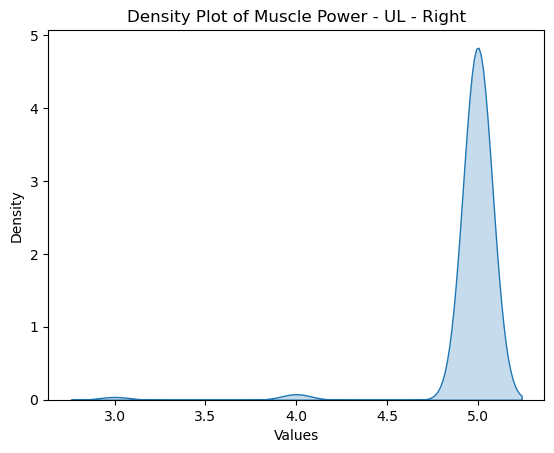

Skewness of Muscle Power - UL - Right: -7.654314851349765
Kurtosis of Muscle Power - UL - Right: 62.67604198075714
The distribution is left-skewed.
The distribution has heavier tails than a normal distribution.


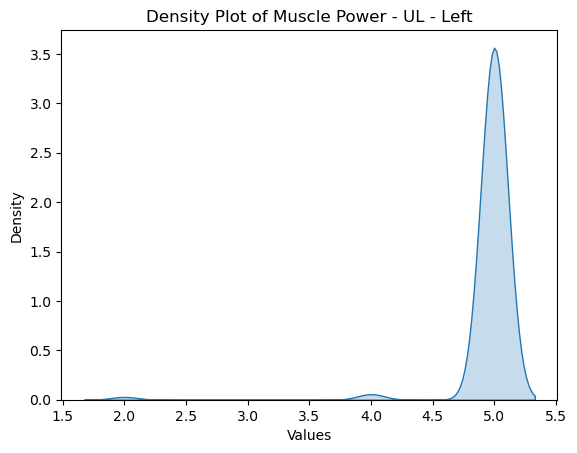

Skewness of Muscle Power - UL - Left: -9.007874109734086
Kurtosis of Muscle Power - UL - Left: 87.90811444890514
The distribution is left-skewed.
The distribution has heavier tails than a normal distribution.


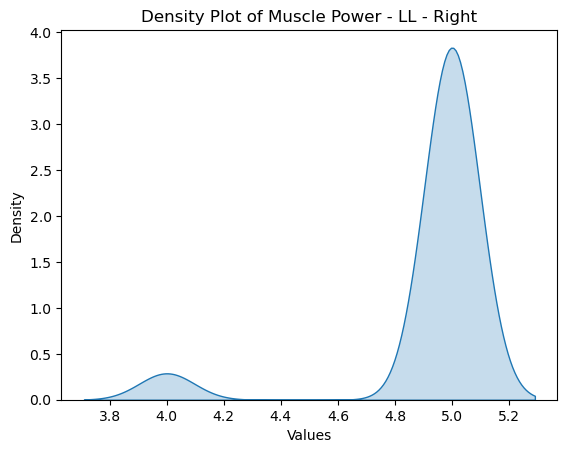

Skewness of Muscle Power - LL - Right: -3.4174897451890494
Kurtosis of Muscle Power - LL - Right: 9.831437736949542
The distribution is left-skewed.
The distribution has heavier tails than a normal distribution.


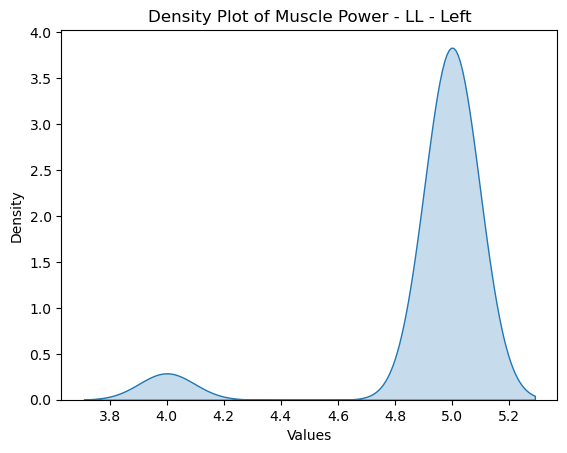

Skewness of Muscle Power - LL - Left: -3.4174897451890507
Kurtosis of Muscle Power - LL - Left: 9.83143773694955
The distribution is left-skewed.
The distribution has heavier tails than a normal distribution.


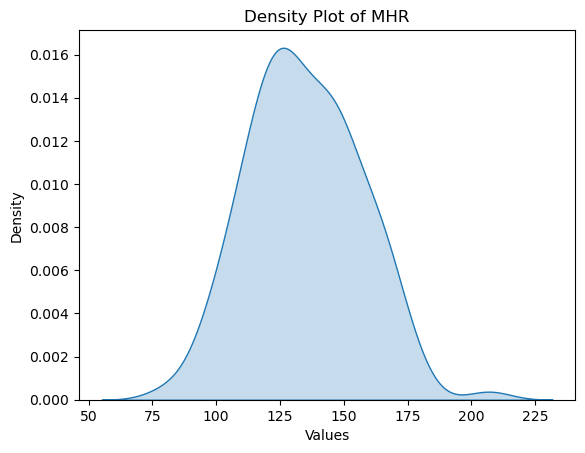

Skewness of MHR: 0.22316811320053673
Kurtosis of MHR: -0.019154625644445478
The distribution is right-skewed.
The distribution has lighter tails than a normal distribution.


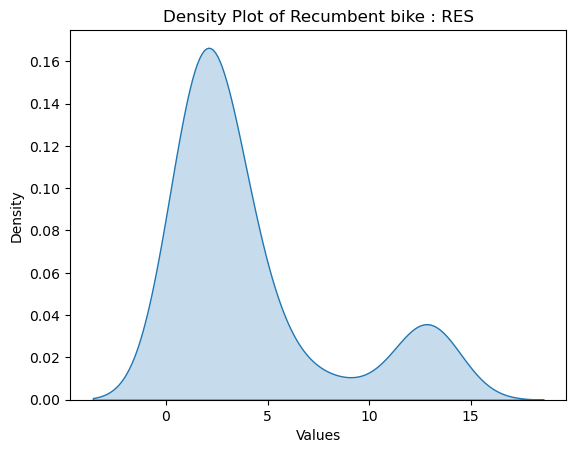

Skewness of Recumbent bike : RES: 1.5050370279420728
Kurtosis of Recumbent bike : RES: 0.8275201658368534
The distribution is right-skewed.
The distribution has heavier tails than a normal distribution.


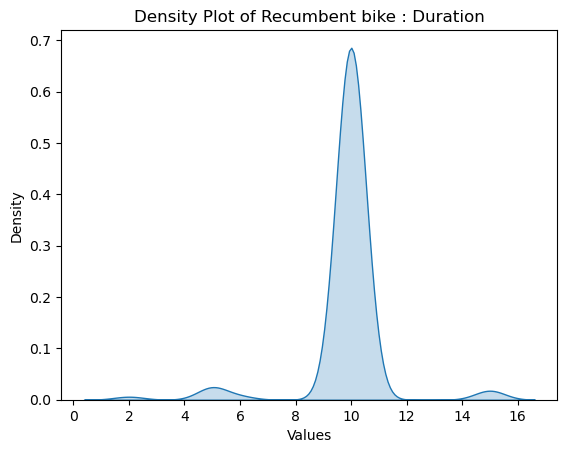

Skewness of Recumbent bike : Duration: -1.692289210063855
Kurtosis of Recumbent bike : Duration: 14.128794731392663
The distribution is left-skewed.
The distribution has heavier tails than a normal distribution.


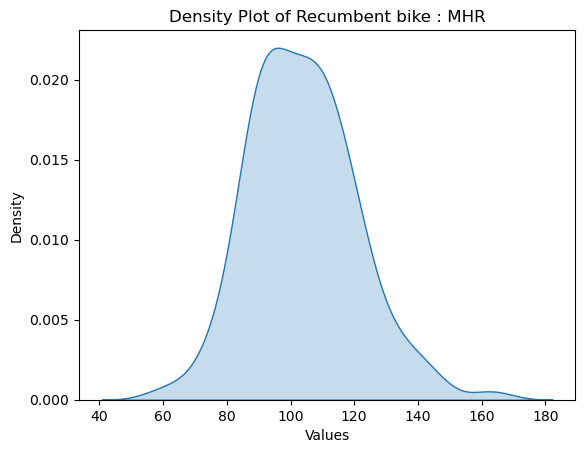

Skewness of Recumbent bike : MHR: 0.4735340185115714
Kurtosis of Recumbent bike : MHR: 0.7588103196781466
The distribution is right-skewed.
The distribution has heavier tails than a normal distribution.


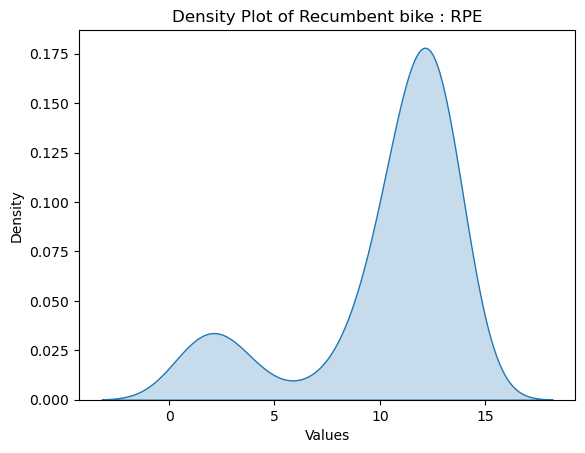

Skewness of Recumbent bike : RPE: -1.571368271144096
Kurtosis of Recumbent bike : RPE: 1.129704460869513
The distribution is left-skewed.
The distribution has heavier tails than a normal distribution.


In [141]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis


for column in CRP2.columns:
    if CRP2[column].dtype == 'float64':
        plt.figure()  # Create a new figure for each plot
        
        # Reset index to avoid duplicate labels issue
        data = CRP2[[column]].reset_index(drop=True)
        
        sns.kdeplot(data[column], shade=True)
        plt.title(f'Density Plot of {column}')
        plt.xlabel('Values')
        plt.ylabel('Density')
        plt.show()
        
        # Calculate skewness and kurtosis
        skewness = data[column].skew()
        kurt = data[column].kurtosis()
        
        print(f"Skewness of {column}: {skewness}")
        print(f"Kurtosis of {column}: {kurt}")

        if skewness > 0:
            print("The distribution is right-skewed.")
        elif skewness < 0:
            print("The distribution is left-skewed.")
        else:
            print("The distribution is approximately symmetric.")

        if kurt > 0:
            print("The distribution has heavier tails than a normal distribution.")
        elif kurt < 0:
            print("The distribution has lighter tails than a normal distribution.")
        else:
            print("The distribution has a similar tail behavior as a normal distribution.")

#### Checking for total missing values for each column

In [142]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Calculate total NAs
CRP2.isnull().sum()

Risk Factor - BMI                82
Test Today - Completed stage     14
Test Today - HRR                 15
Test Today - peak HR             12
Diagnosis                        26
Smoking                          91
Alcoholic                       120
Risk Level                       36
Risk Factor - HPT               110
Risk Factor - DM                 80
Risk Factor - HPL               167
Risk Factor - Family hx          94
Risk Factor - Stress            136
Test Today - Resting HR          10
Test Today - BP resting           6
Past Medical History - DM       127
Muscle Power - UL - Right        40
Muscle Power - UL - Left         40
Muscle Power - LL - Right        41
Muscle Power - LL - Left         41
Walking                          40
Gait                             40
Posture                          41
Test Today - BP peak              9
MHR                              41
Recumbent bike : RES             53
Recumbent bike : Duration        44
Recumbent bike : MHR        

In [143]:
#Calculate percentage of missing values
CRP2.isnull().mean() * 100

Risk Factor - BMI               48.235294
Test Today - Completed stage     8.235294
Test Today - HRR                 8.823529
Test Today - peak HR             7.058824
Diagnosis                       15.294118
Smoking                         53.529412
Alcoholic                       70.588235
Risk Level                      21.176471
Risk Factor - HPT               64.705882
Risk Factor - DM                47.058824
Risk Factor - HPL               98.235294
Risk Factor - Family hx         55.294118
Risk Factor - Stress            80.000000
Test Today - Resting HR          5.882353
Test Today - BP resting          3.529412
Past Medical History - DM       74.705882
Muscle Power - UL - Right       23.529412
Muscle Power - UL - Left        23.529412
Muscle Power - LL - Right       24.117647
Muscle Power - LL - Left        24.117647
Walking                         23.529412
Gait                            23.529412
Posture                         24.117647
Test Today - BP peak             5

<AxesSubplot:>

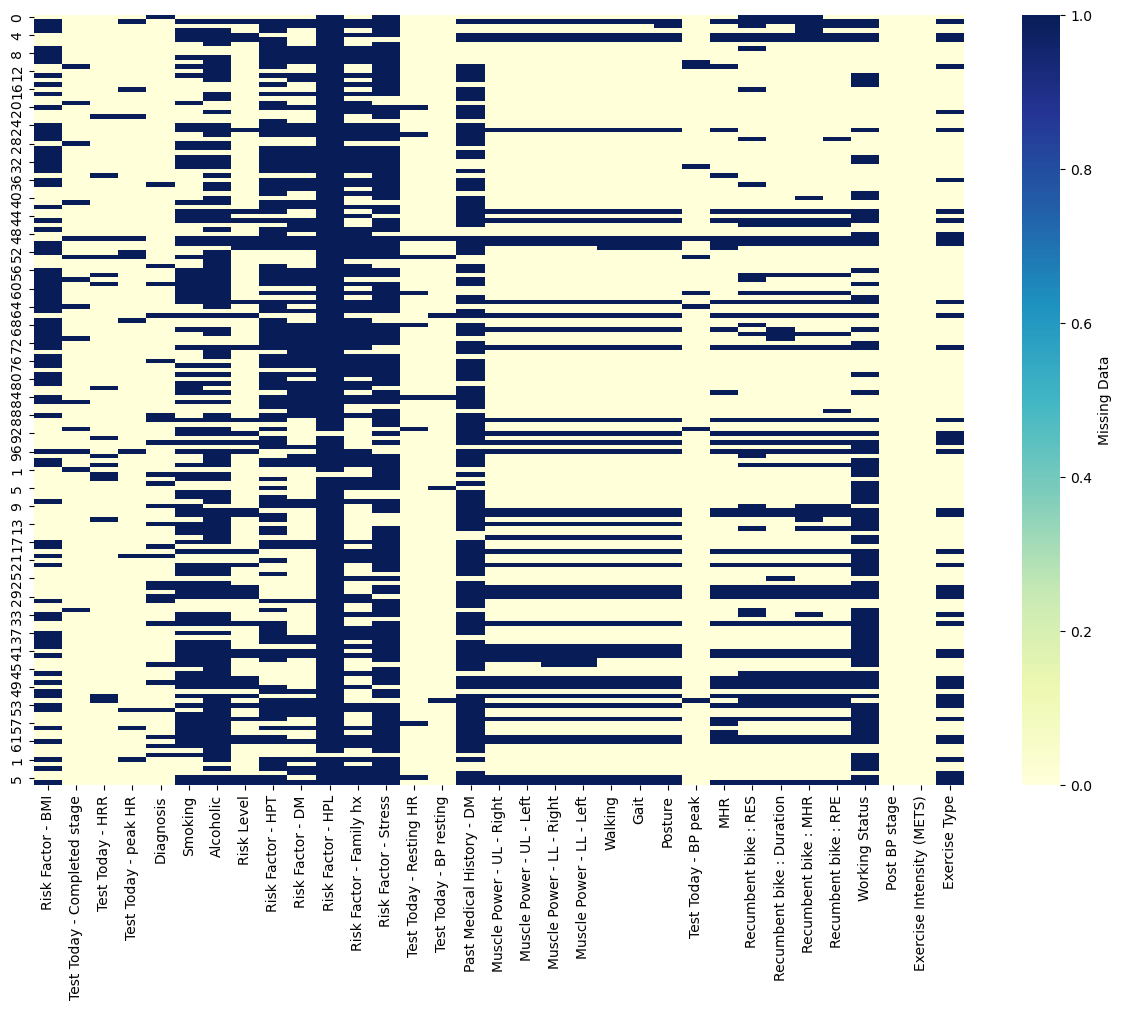

In [144]:
# Visualizing Missing Data using Seaborn heatmap()
plt.figure(figsize=(15,10))
sns.heatmap(CRP2.isna(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

#### Removing column that has more than 50% missing values

In [145]:
CRP3 = CRP2.copy()

# Calculate the threshold for the minimum non-null values (50% or more missing values)
threshold = len(CRP3) * 0.5

# Drop columns with more than 50% missing values and display the dropped column names
drop_columns = CRP3.columns[CRP3.isna().sum() > threshold]
CRP3.drop(drop_columns, axis=1, inplace=True)


# Display the dropped columns
print("\nDropped Columns:")
print(drop_columns)


Dropped Columns:
Index(['Smoking', 'Alcoholic', 'Risk Factor - HPT', 'Risk Factor - HPL',
       'Risk Factor - Family hx', 'Risk Factor - Stress',
       'Past Medical History - DM', 'Working Status'],
      dtype='object')


In [146]:

CRP3.columns = CRP3.columns.str.replace('[^a-zA-Z0-9]', '', regex=True)
CRP3.head()

,RiskFactorBMI,TestTodayCompletedstage,TestTodayHRR,TestTodaypeakHR,Diagnosis,RiskLevel,RiskFactorDM,TestTodayRestingHR,TestTodayBPresting,MusclePowerULRight,...,Posture,TestTodayBPpeak,MHR,RecumbentbikeRES,RecumbentbikeDuration,RecumbentbikeMHR,RecumbentbikeRPE,PostBPstage,ExerciseIntensityMETS,ExerciseType
0,Overweight,3,Abnormal,High Intensity,NaN,Moderate,No,64,Normal,5.0,...,Normal,High blood pressure (Stage 1),123.0,NaN,NaN,NaN,12.0,Normal,Vigorous activities,Stretching
1,NaN,5,Normal,NaN,"CAD, PostPCI",NaN,NaN,47,Normal,NaN,...,NaN,High blood pressure (Stage 1),NaN,NaN,NaN,NaN,NaN,NaN,Vigorous activities,NaN
2,NaN,3,Abnormal,High Intensity,Post-CABG,Moderate,NaN,65,Normal,5.0,...,NaN,Hypertensive crisis,121.0,NaN,10.0,NaN,NaN,Hypertension Stage 1,Vigorous activities,Stretching
3,NaN,4,Abnormal,High Intensity,"CAD, PostPCI",Moderate,Yes,77,High blood pressure (Stage 1),5.0,...,Normal,Normal,121.0,2.0,6.0,NaN,11.0,Normal,Vigorous activities,Slow Walking
4,Overweight,3,Normal,High Intensity,PostCABG,NaN,Yes,66,Normal,NaN,...,NaN,High blood pressure (Stage 1),NaN,NaN,NaN,NaN,NaN,NaN,Vigorous activities,NaN


#### Mode Data Imputation for categorical data

In [147]:
cat_columns = CRP3.select_dtypes(include=['category']).columns

for col in cat_columns:
    mode_value = CRP3[col].mode().iloc[0]
    CRP3[col].fillna(mode_value, inplace=True)

#### Median Data Imputation for numerical data

- as the data distribution is heavily skewed, median imputation is used to impute missing values

In [148]:
# Identify 'float64' columns
float_columns = CRP3.select_dtypes(include=['float64']).columns


# Impute missing values with median for 'float64' columns
for col in float_columns:
    median_value = CRP3[col].median()
    CRP3[col].fillna(median_value, inplace=True)

In [149]:
CRP_imputeddf = CRP3.copy()

#### Verifying imputed data

In [150]:
#Calculate percentage of missing values
CRP_imputeddf.isnull().mean() * 100

RiskFactorBMI              0.0
TestTodayCompletedstage    0.0
TestTodayHRR               0.0
TestTodaypeakHR            0.0
Diagnosis                  0.0
RiskLevel                  0.0
RiskFactorDM               0.0
TestTodayRestingHR         0.0
TestTodayBPresting         0.0
MusclePowerULRight         0.0
MusclePowerULLeft          0.0
MusclePowerLLRight         0.0
MusclePowerLLLeft          0.0
Walking                    0.0
Gait                       0.0
Posture                    0.0
TestTodayBPpeak            0.0
MHR                        0.0
RecumbentbikeRES           0.0
RecumbentbikeDuration      0.0
RecumbentbikeMHR           0.0
RecumbentbikeRPE           0.0
PostBPstage                0.0
ExerciseIntensityMETS      0.0
ExerciseType               0.0
dtype: float64

<AxesSubplot:>

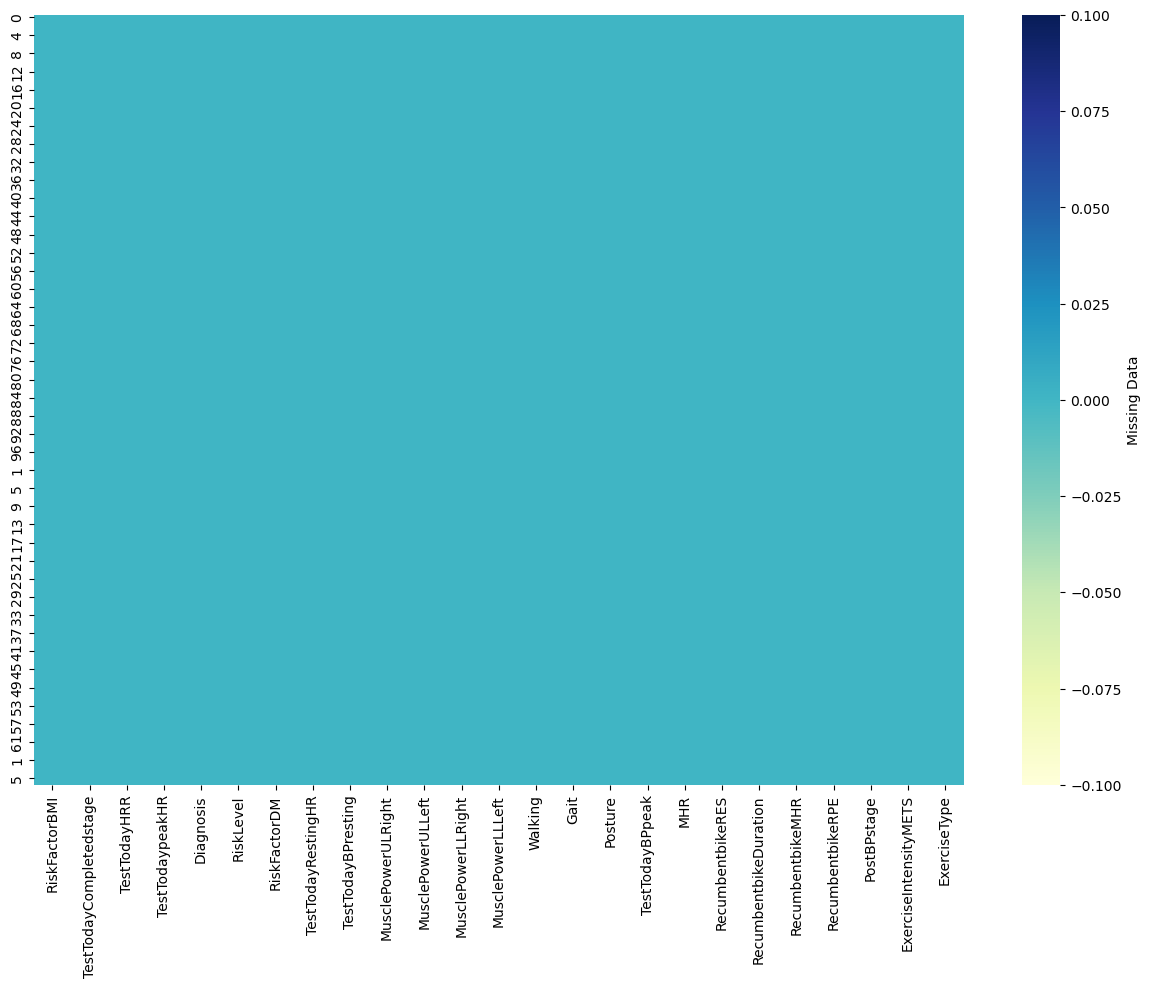

In [151]:
# Verify imputed data using visualization

plt.figure(figsize=(15,10))
sns.heatmap(CRP_imputeddf.isna(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

In [152]:

file_path = 'imputed_CRP4.csv'  

# Save the DataFrame to a CSV file
CRP_imputeddf.to_csv(file_path, index=False)  

print(f"DataFrame has been saved to {file_path}.")

DataFrame has been saved to imputed_CRP4.csv.


In [153]:
CRP_imputeddf.head()

,RiskFactorBMI,TestTodayCompletedstage,TestTodayHRR,TestTodaypeakHR,Diagnosis,RiskLevel,RiskFactorDM,TestTodayRestingHR,TestTodayBPresting,MusclePowerULRight,...,Posture,TestTodayBPpeak,MHR,RecumbentbikeRES,RecumbentbikeDuration,RecumbentbikeMHR,RecumbentbikeRPE,PostBPstage,ExerciseIntensityMETS,ExerciseType
0,Overweight,3,Abnormal,High Intensity,CAD,Moderate,No,64,Normal,5.0,...,Normal,High blood pressure (Stage 1),123.0,3.0,10.0,102.0,12.0,Normal,Vigorous activities,Stretching
1,Overweight,5,Normal,High Intensity,"CAD, PostPCI",Moderate,Yes,47,Normal,5.0,...,Normal,High blood pressure (Stage 1),133.0,3.0,10.0,102.0,12.0,NaN,Vigorous activities,Stretching both UL/LL
2,Overweight,3,Abnormal,High Intensity,Post-CABG,Moderate,Yes,65,Normal,5.0,...,Normal,Hypertensive crisis,121.0,3.0,10.0,102.0,12.0,Hypertension Stage 1,Vigorous activities,Stretching
3,Overweight,4,Abnormal,High Intensity,"CAD, PostPCI",Moderate,Yes,77,High blood pressure (Stage 1),5.0,...,Normal,Normal,121.0,2.0,6.0,102.0,11.0,Normal,Vigorous activities,Slow Walking
4,Overweight,3,Normal,High Intensity,PostCABG,Moderate,Yes,66,Normal,5.0,...,Normal,High blood pressure (Stage 1),133.0,3.0,10.0,102.0,12.0,NaN,Vigorous activities,Stretching both UL/LL


# Transform Data

Setting maximum and minimum values for Recumbent bike: RES and maximum value for MHR

In [154]:
CRP_transform = pd.DataFrame(CRP_imputeddf.copy())

<span style="color:blue"> RecumbentbikeRES </span>

In [155]:
from sklearn.preprocessing import MinMaxScaler
scale_features = {'RecumbentbikeRES': (1, 7), 'MHR': (80, 170)}

for feature, (new_min, new_max) in scale_features.items():
    scaler=MinMaxScaler(feature_range=(new_min, new_max))
    CRP_transform[feature] = scaler.fit_transform(CRP_transform[[feature]])

In [156]:
CRP_transform.head()

,RiskFactorBMI,TestTodayCompletedstage,TestTodayHRR,TestTodaypeakHR,Diagnosis,RiskLevel,RiskFactorDM,TestTodayRestingHR,TestTodayBPresting,MusclePowerULRight,...,Posture,TestTodayBPpeak,MHR,RecumbentbikeRES,RecumbentbikeDuration,RecumbentbikeMHR,RecumbentbikeRPE,PostBPstage,ExerciseIntensityMETS,ExerciseType
0,Overweight,3,Abnormal,High Intensity,CAD,Moderate,No,64,Normal,5.0,...,Normal,High blood pressure (Stage 1),110.472441,1.923077,10.0,102.0,12.0,Normal,Vigorous activities,Stretching
1,Overweight,5,Normal,High Intensity,"CAD, PostPCI",Moderate,Yes,47,Normal,5.0,...,Normal,High blood pressure (Stage 1),117.559055,1.923077,10.0,102.0,12.0,NaN,Vigorous activities,Stretching both UL/LL
2,Overweight,3,Abnormal,High Intensity,Post-CABG,Moderate,Yes,65,Normal,5.0,...,Normal,Hypertensive crisis,109.055118,1.923077,10.0,102.0,12.0,Hypertension Stage 1,Vigorous activities,Stretching
3,Overweight,4,Abnormal,High Intensity,"CAD, PostPCI",Moderate,Yes,77,High blood pressure (Stage 1),5.0,...,Normal,Normal,109.055118,1.461538,6.0,102.0,11.0,Normal,Vigorous activities,Slow Walking
4,Overweight,3,Normal,High Intensity,PostCABG,Moderate,Yes,66,Normal,5.0,...,Normal,High blood pressure (Stage 1),117.559055,1.923077,10.0,102.0,12.0,NaN,Vigorous activities,Stretching both UL/LL


In [157]:
float_columns = ['MHR', 'RecumbentbikeRES', 'RecumbentbikeDuration',
                 'RecumbentbikeMHR','RecumbentbikeRPE', 'MusclePowerULRight',
       'MusclePowerULLeft', 'MusclePowerLLRight', 'MusclePowerLLLeft', 'TestTodayRestingHR']
CRP_transform[float_columns] = CRP_transform[float_columns].astype(int)
CRP_transform.dtypes

RiskFactorBMI              category
TestTodayCompletedstage    category
TestTodayHRR               category
TestTodaypeakHR            category
Diagnosis                  category
RiskLevel                  category
RiskFactorDM               category
TestTodayRestingHR            int32
TestTodayBPresting         category
MusclePowerULRight            int32
MusclePowerULLeft             int32
MusclePowerLLRight            int32
MusclePowerLLLeft             int32
Walking                    category
Gait                       category
Posture                    category
TestTodayBPpeak            category
MHR                           int32
RecumbentbikeRES              int32
RecumbentbikeDuration         int32
RecumbentbikeMHR              int32
RecumbentbikeRPE              int32
PostBPstage                category
ExerciseIntensityMETS      category
ExerciseType               category
dtype: object

## 4. Clustering : Kmeans method

In [158]:
!pip install kmodes
!pip install kproptotypes

ERROR: Could not find a version that satisfies the requirement kproptotypes (from versions: none)
ERROR: No matching distribution found for kproptotypes


### 4.1 Clustering Analysis

In [159]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics.cluster import calinski_harabasz_score, davies_bouldin_score
import pandas as pd

# Assuming you have already defined CRP_transform and selected_columns
selected_columns = ['MHR', 'RecumbentbikeRES', 'RecumbentbikeDuration', 'RecumbentbikeMHR', 'RecumbentbikeRPE']
# Combine categorical and numerical data
X = CRP_transform[selected_columns]

n_clusters_range = range(2, 11)

metrics_dict2 = {
    'Silhouette Score': [],
    'Calinski-Harabasz Index': [],
    'Davies-Bouldin Index': [],
    'Inertia': []  # Corrected the key name here
}

for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, verbose=1)
    labels = kmeans.fit_predict(X)  # Corrected from fit to fit_predict

    silhouette = metrics.silhouette_score(X, labels)
    calinski_harabasz = calinski_harabasz_score(X, labels)
    davies_bouldin = davies_bouldin_score(X, labels)
    inertia = kmeans.inertia_  # Corrected the variable name here

    metrics_dict2['Silhouette Score'].append(silhouette)
    metrics_dict2['Calinski-Harabasz Index'].append(calinski_harabasz)
    metrics_dict2['Davies-Bouldin Index'].append(davies_bouldin)
    metrics_dict2['Inertia'].append(inertia)

    print("Number of Clusters: {}".format(n_clusters))
    print("Silhouette Score = {:8.3f}".format(silhouette))
    print("Calinski-Harabasz Index = {:8.3f}".format(calinski_harabasz))
    print("Davies-Bouldin Index = {:8.3f}".format(davies_bouldin))
    print("Inertia = {:8.3f}".format(inertia))
    print("=" * 40)

# Example usage:
# Access the metrics dictionary
print(metrics_dict2)


Initialization complete
Iteration 0, inertia 44471.0
Iteration 1, inertia 38073.59219796075
Iteration 2, inertia 36169.50734483302
Iteration 3, inertia 35019.12403846153
Iteration 4, inertia 34643.379388593545
Iteration 5, inertia 34604.565381659835
Iteration 6, inertia 34465.366452463335
Iteration 7, inertia 34407.14272030652
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 74185.0
Iteration 1, inertia 35100.827061707045
Iteration 2, inertia 34494.95755811559
Iteration 3, inertia 34438.80318709124
Iteration 4, inertia 34412.724110671945
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 85509.0
Iteration 1, inertia 39103.905069444445
Iteration 2, inertia 38941.43729350561
Iteration 3, inertia 38895.58559113301
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 54243.0
Iteration 1, inertia 43144.66922831832
Iteration 2, inertia 39672.35540248258
Iteration 3, inertia

Iteration 10, inertia 16471.6632798574
Converged at iteration 10: strict convergence.
Initialization complete
Iteration 0, inertia 18807.0
Iteration 1, inertia 16198.785805488204
Iteration 2, inertia 15918.487859983506
Iteration 3, inertia 15779.346559629706
Iteration 4, inertia 15634.788310344878
Iteration 5, inertia 15623.062062947514
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 19023.0
Iteration 1, inertia 15724.84052576617
Iteration 2, inertia 15416.91498018969
Iteration 3, inertia 15395.269748886836
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 28362.0
Iteration 1, inertia 17809.093919343497
Iteration 2, inertia 16869.16421260595
Iteration 3, inertia 16702.556318690036
Iteration 4, inertia 16648.005100338436
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 20594.0
Iteration 1, inertia 16387.04647756036
Iteration 2, inertia 15930.702122441882
Iteratio

Iteration 11, inertia 12187.412820107476
Iteration 12, inertia 12053.122365827774
Iteration 13, inertia 11617.377285671795
Iteration 14, inertia 11560.094538845251
Iteration 15, inertia 11545.432136713773
Iteration 16, inertia 11534.341972176575
Iteration 17, inertia 11529.991218745023
Converged at iteration 17: strict convergence.
Number of Clusters: 7
Silhouette Score =    0.400
Calinski-Harabasz Index =  136.157
Davies-Bouldin Index =    0.964
Inertia = 11260.212
Initialization complete
Iteration 0, inertia 13396.0
Iteration 1, inertia 10458.238071097372
Iteration 2, inertia 10253.681468488861
Iteration 3, inertia 10244.913012820512
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 16312.0
Iteration 1, inertia 11480.451230170074
Iteration 2, inertia 11163.579161417618
Iteration 3, inertia 11114.396704366794
Iteration 4, inertia 11097.137968437339
Iteration 5, inertia 11090.599063111893
Converged at iteration 5: strict convergence.
Initializat

In [160]:
# Create a comparison table using pandas
comparison_kmeans = pd.DataFrame(metrics_dict2, index=n_clusters_range)

# Display the comparison table
print(comparison_kmeans)

    Silhouette Score  Calinski-Harabasz Index  Davies-Bouldin Index  \
2           0.464747               162.535977              0.834392   
3           0.428821               167.808609              0.808694   
4           0.407228               159.083096              0.822494   
5           0.388309               148.924400              0.907741   
6           0.397378               139.716799              0.990864   
7           0.400447               136.156520              0.963801   
8           0.409001               133.828193              0.888529   
9           0.404516               131.977322              0.860919   
10          0.411675               129.336095              0.847027   

         Inertia  
2   34407.142720  
3   22492.471228  
4   17469.755933  
5   14683.512694  
6   12870.651091  
7   11260.212184  
8    9980.572978  
9    8956.907918  
10   8180.538778  


### Identify optimal number of cluster, K using elbow method

In [161]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

selected_columns = ['MHR', 'RecumbentbikeRES', 'RecumbentbikeDuration', 'RecumbentbikeMHR', 'RecumbentbikeRPE']

# Combine categorical and numerical data
X = CRP_transform[selected_columns]

In [162]:
# Perform elbow method
inertias = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    clusters = kmeans.fit(X)
    inertias.append(kmeans.inertia_)

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



Text(0.5, 1.0, 'Elbow Method for Optimal k')

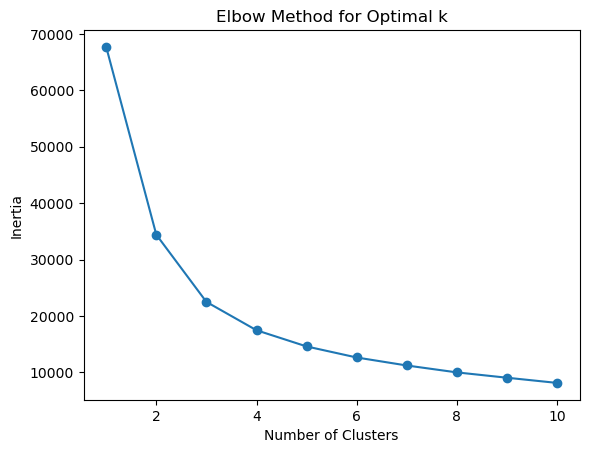

In [163]:
# Plot the elbow curve
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')

In [164]:
print (inertias)

[67695.2294117647, 34407.14272030652, 22492.471228239843, 17463.716211449548, 14593.06661395957, 12634.033188944954, 11216.249164578112, 9992.203735545501, 9046.95917654452, 8126.04836752369]


#### Fitting the data into the cluster

In [165]:
selected_columns = ['MHR', 'RecumbentbikeRES', 'RecumbentbikeDuration', 'RecumbentbikeMHR', 'RecumbentbikeRPE']
# Combine categorical and numerical data
n_clusters = 3
X = CRP_transform[selected_columns]
clusters = KMeans(n_clusters=n_clusters, random_state=42, verbose=1)
clabels = clusters.fit_predict(X)

Initialization complete
Iteration 0, inertia 33137.0
Iteration 1, inertia 23655.430877187897
Iteration 2, inertia 22605.861610785
Iteration 3, inertia 22503.671130952378
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 27572.0
Iteration 1, inertia 23734.20765361178
Iteration 2, inertia 23186.034858179653
Iteration 3, inertia 22811.918663194447
Iteration 4, inertia 22738.29684930127
Iteration 5, inertia 22686.79671791308
Iteration 6, inertia 22645.358919487568
Iteration 7, inertia 22593.775882523605
Iteration 8, inertia 22550.242342570622
Iteration 9, inertia 22512.03213969993
Iteration 10, inertia 22492.471228239843
Converged at iteration 10: strict convergence.
Initialization complete
Iteration 0, inertia 30794.0
Iteration 1, inertia 24238.624528514927
Iteration 2, inertia 23659.875990979926
Iteration 3, inertia 23283.846287878194
Iteration 4, inertia 23110.845028996977
Iteration 5, inertia 22870.705671479725
Iteration 6, inertia 22719.4046650

In [166]:
CRP_clusterdf = CRP_transform.copy()

CRP_clusterdf.reset_index(drop=True, inplace=True)

In [167]:
CRP_clusterdf['Cluster Labels'] = clusters.labels_
CRP_clusterdf['Rehab Plan'] = CRP_clusterdf['Cluster Labels'].map({0: 'Rehab A', 1: 'Rehab B', 2: 'Rehab C'})

# Format the cluster into a category column
CRP_clusterdf['Rehab Plan'] = CRP_clusterdf['Rehab Plan'].astype('category')

# Group data points by clusters
cluster_groups = CRP_clusterdf.groupby('Cluster Labels')

# Loop through each cluster to analyze and interpret
for cluster_label, cluster_data in cluster_groups:
    print(f"Cluster {cluster_label}:")
    
    # Describe numerical features of the cluster
    print(cluster_data[['MHR', 'RecumbentbikeRES', 'RecumbentbikeDuration', 'RecumbentbikeMHR', 'RecumbentbikeRPE']].describe())

print("\n")


Cluster 0:
              MHR  RecumbentbikeRES  RecumbentbikeDuration  RecumbentbikeMHR  \
count   94.000000         94.000000              94.000000         94.000000   
mean   118.680851          1.297872               9.957447        103.351064   
std      5.809175          1.035185               1.116011          5.696079   
min    106.000000          1.000000               5.000000         90.000000   
25%    117.000000          1.000000              10.000000        102.000000   
50%    117.000000          1.000000              10.000000        102.000000   
75%    120.750000          1.000000              10.000000        105.000000   
max    136.000000          6.000000              15.000000        120.000000   

       RecumbentbikeRPE  
count         94.000000  
mean          11.319149  
std            2.225042  
min            1.000000  
25%           11.000000  
50%           12.000000  
75%           12.000000  
max           14.000000  
Cluster 1:
              MHR  Recu

In [168]:
CRP_clusterdf.head()

,RiskFactorBMI,TestTodayCompletedstage,TestTodayHRR,TestTodaypeakHR,Diagnosis,RiskLevel,RiskFactorDM,TestTodayRestingHR,TestTodayBPresting,MusclePowerULRight,...,MHR,RecumbentbikeRES,RecumbentbikeDuration,RecumbentbikeMHR,RecumbentbikeRPE,PostBPstage,ExerciseIntensityMETS,ExerciseType,Cluster Labels,Rehab Plan
0,Overweight,3,Abnormal,High Intensity,CAD,Moderate,No,64,Normal,5,...,110,1,10,102,12,Normal,Vigorous activities,Stretching,0,Rehab A
1,Overweight,5,Normal,High Intensity,"CAD, PostPCI",Moderate,Yes,47,Normal,5,...,117,1,10,102,12,NaN,Vigorous activities,Stretching both UL/LL,0,Rehab A
2,Overweight,3,Abnormal,High Intensity,Post-CABG,Moderate,Yes,65,Normal,5,...,109,1,10,102,12,Hypertension Stage 1,Vigorous activities,Stretching,0,Rehab A
3,Overweight,4,Abnormal,High Intensity,"CAD, PostPCI",Moderate,Yes,77,High blood pressure (Stage 1),5,...,109,1,6,102,11,Normal,Vigorous activities,Slow Walking,0,Rehab A
4,Overweight,3,Normal,High Intensity,PostCABG,Moderate,Yes,66,Normal,5,...,117,1,10,102,12,NaN,Vigorous activities,Stretching both UL/LL,0,Rehab A


##### Removing 'Additional', 'RecumbentbikeRES',	'RecumbentbikeDuration'	, 'RecumbentbikeMHR', 	'RecumbentbikeRPE',  'ExerciseType', 'Cluster Labels' , and 'MHR' columns 

In [169]:
#Create a copy
CRP_final = CRP_clusterdf.copy()

#Drop columns
CRP_final.drop(columns=['RecumbentbikeRES', 'RecumbentbikeDuration' , 'RecumbentbikeMHR', 'RecumbentbikeRPE', 'MHR', 'ExerciseType', 'Cluster Labels'], inplace=True)

#Display result
CRP_final.head()

,RiskFactorBMI,TestTodayCompletedstage,TestTodayHRR,TestTodaypeakHR,Diagnosis,RiskLevel,RiskFactorDM,TestTodayRestingHR,TestTodayBPresting,MusclePowerULRight,MusclePowerULLeft,MusclePowerLLRight,MusclePowerLLLeft,Walking,Gait,Posture,TestTodayBPpeak,PostBPstage,ExerciseIntensityMETS,Rehab Plan
0,Overweight,3,Abnormal,High Intensity,CAD,Moderate,No,64,Normal,5,5,5,5,Independent,Normal,Normal,High blood pressure (Stage 1),Normal,Vigorous activities,Rehab A
1,Overweight,5,Normal,High Intensity,"CAD, PostPCI",Moderate,Yes,47,Normal,5,5,5,5,Independent,Normal,Normal,High blood pressure (Stage 1),NaN,Vigorous activities,Rehab A
2,Overweight,3,Abnormal,High Intensity,Post-CABG,Moderate,Yes,65,Normal,5,5,5,5,Independent,Normal,Normal,Hypertensive crisis,Hypertension Stage 1,Vigorous activities,Rehab A
3,Overweight,4,Abnormal,High Intensity,"CAD, PostPCI",Moderate,Yes,77,High blood pressure (Stage 1),5,5,5,5,Independent,Normal,Normal,Normal,Normal,Vigorous activities,Rehab A
4,Overweight,3,Normal,High Intensity,PostCABG,Moderate,Yes,66,Normal,5,5,5,5,Independent,Normal,Normal,High blood pressure (Stage 1),NaN,Vigorous activities,Rehab A


In [170]:
CRP_final.dtypes

RiskFactorBMI              category
TestTodayCompletedstage    category
TestTodayHRR               category
TestTodaypeakHR            category
Diagnosis                  category
RiskLevel                  category
RiskFactorDM               category
TestTodayRestingHR            int32
TestTodayBPresting         category
MusclePowerULRight            int32
MusclePowerULLeft             int32
MusclePowerLLRight            int32
MusclePowerLLLeft             int32
Walking                    category
Gait                       category
Posture                    category
TestTodayBPpeak            category
PostBPstage                category
ExerciseIntensityMETS      category
Rehab Plan                 category
dtype: object

### 5.1  Examine target data distribution

In [171]:
import plotly.express as px
counts = CRP_final['Rehab Plan'].value_counts()
fig = px.bar(x=counts.index, y=counts.values, color=counts.index)
fig.update_layout(title=f'Bar plot of {column}', xaxis_title='Values', yaxis_title='Frequency')
fig.show()

In [172]:
import plotly.graph_objects as go

count_table = pd.crosstab(CRP_clusterdf['RiskLevel'], CRP_clusterdf['Rehab Plan'])

# Bar Chart
bar_fig = go.Figure()

bar_fig.add_trace(go.Bar(
    x=count_table.index,
    y=count_table['Rehab A'],
    name='Rehab Plan A',
    marker_color='rgb(55, 83, 109)',
    text=count_table['Rehab A'],
    textposition='auto'
))

bar_fig.add_trace(go.Bar(
    x=count_table.index,
    y=count_table['Rehab B'],
    name='Rehab Plan B',
    marker_color='rgb(255, 87, 34)',
    text=count_table['Rehab B'],
    textposition='auto'
))

bar_fig.add_trace(go.Bar(
    x=count_table.index,
    y=count_table['Rehab C'],
    name='Rehab Plan C',
    marker_color='rgb(173, 216, 230)',
    text=count_table['Rehab C'],
    textposition='auto'
    
))

bar_fig.update_layout(
    title='Bar Chart: Rehab Plan vs Risk Level',
    xaxis=dict(title='Risk Level'),
    yaxis=dict(title='Count'),
    barmode='stack'
)

bar_fig.show()



In [173]:
import plotly.graph_objects as go

count_table = pd.crosstab(CRP_clusterdf['RiskFactorBMI'], CRP_clusterdf['Rehab Plan'])

# Bar Chart
bar_fig = go.Figure()

bar_fig.add_trace(go.Bar(
    x=count_table.index,
    y=count_table['Rehab A'],
    name='Rehab Plan A',
    marker_color='rgb(55, 83, 109)',
    text=count_table['Rehab A'],
    textposition='auto'
))

bar_fig.add_trace(go.Bar(
    x=count_table.index,
    y=count_table['Rehab B'],
    name='Rehab Plan B',
    marker_color='rgb(255, 87, 34)',
    text=count_table['Rehab B'],
    textposition='auto'
))

bar_fig.add_trace(go.Bar(
    x=count_table.index,
    y=count_table['Rehab C'],
    name='Rehab Plan C',
    marker_color='rgb(173, 216, 230)',
    text=count_table['Rehab C'],
    textposition='auto'
    
))

bar_fig.update_layout(
    title='Bar Chart: Rehab Plan vs Risk BMI',
    xaxis=dict(title='Risk Factor BMI'),
    yaxis=dict(title='Count'),
    barmode='stack'
)

bar_fig.show()



In [174]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_columns = CRP_final.select_dtypes(include='category').columns

# Convert values in categorical columns to strings
for col in categorical_columns:
    CRP_final[col] = CRP_final[col].astype(str)

# Initialize a LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in categorical_columns:
    CRP_final[col] = label_encoder.fit_transform(CRP_final[col])

# Display the first few rows of the transformed dataset to confirm encoding
print("Transformed Data (First Few Rows):")
print(CRP_final)

Transformed Data (First Few Rows):
     RiskFactorBMI  TestTodayCompletedstage  TestTodayHRR  TestTodaypeakHR  \
0                2                        3             0                1   
1                2                        5             1                1   
2                2                        3             0                1   
3                2                        4             0                1   
4                2                        3             1                1   
..             ...                      ...           ...              ...   
165              0                        3             0                1   
166              2                        4             1                4   
167              0                        4             1                1   
168              1                        4             1                1   
169              2                        2             1                4   

     Diagnosis  RiskLevel  R

### 5.2 Balancing data using random over sampling method

In [175]:
!pip install imbalanced-learn
import imblearn
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

# Split the DataFrame into features (X) and target (y)

X = CRP_final.drop(columns=['Rehab Plan'])
y = CRP_final['Rehab Plan']

# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='auto', random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
columns = X_train.columns

# fit and apply the transform
X_over, y_over = oversample.fit_resample(X_train, y_train)


# Create a new DataFrame with the resampled data
feature_columns = X.columns.tolist()
resampled_data = pd.DataFrame(X_over, columns=feature_columns)
resampled_data['Rehab Plan'] = y_over

# Check the class distribution before and after oversampling
original_class_distribution = CRP_final['Rehab Plan'].value_counts()
resampled_class_distribution = resampled_data['Rehab Plan'].value_counts()

print("Class Distribution Before OverSampling:")
print(original_class_distribution)

print("\nClass Distribution After OverSampling:")
print(resampled_class_distribution)

Class Distribution Before OverSampling:
0    94
1    44
2    32
Name: Rehab Plan, dtype: int64

Class Distribution After OverSampling:
1    67
0    67
2    67
Name: Rehab Plan, dtype: int64


In [176]:
resampled_data.shape

(201, 20)

In [177]:
#visualize resampled data

import plotly.express as px
counts = resampled_data['Rehab Plan'].value_counts()
fig = px.bar(x=counts.index, y=counts.values, color=counts.index)
fig.update_layout(title=f'Bar plot of {column}', xaxis_title='Values', yaxis_title='Frequency')
fig.show()



In [178]:
resampled_data.to_csv('final_dataCRP.csv', index=False) 
resampled_data1 = pd.DataFrame(resampled_data)
resampled_data1['RiskFactorBMI'] = resampled_data1['RiskFactorBMI'].astype(int)
resampled_data1.dtypes

RiskFactorBMI              int32
TestTodayCompletedstage    int32
TestTodayHRR               int32
TestTodaypeakHR            int32
Diagnosis                  int32
RiskLevel                  int32
RiskFactorDM               int32
TestTodayRestingHR         int32
TestTodayBPresting         int32
MusclePowerULRight         int32
MusclePowerULLeft          int32
MusclePowerLLRight         int32
MusclePowerLLLeft          int32
Walking                    int32
Gait                       int32
Posture                    int32
TestTodayBPpeak            int32
PostBPstage                int32
ExerciseIntensityMETS      int32
Rehab Plan                 int32
dtype: object

In [179]:
!pip install xgboost

!pip install --upgrade xgboost

## Feature Selection & Model Development & Evaluation

For model development, Lasso regression is basically used for linear regression tasks. Hence, in order it becomes applicable for classification tasks, lasso regression in this study will be intergrated with logistic regression as a regularizer by adding penalty (L1) to standard linear regression function.

### Wrapper Methods: Recursive Feature Elimination

In [180]:
from sklearn.feature_selection import RFECV
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score

#splitting data into training and test set

X = resampled_data1.drop(columns=['Rehab Plan'])
y = resampled_data1['Rehab Plan'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

base_estimator = DecisionTreeClassifier(criterion="entropy")


# Feature selection implementation

regressor = RandomForestClassifier(n_estimators= 200, random_state=42)
selector = RFECV(regressor, step = 1, cv=10, n_jobs=-1,verbose=1,  scoring='r2')
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

print('The optimal number of features is {}'.format(selector.n_features_))
features_rfecv = [f for f,s in zip(X, selector.support_) if s]

print('The selected features are:')
print ('{}'.format(features_rfecv)) ## optimal features list


# Model Development


Classifiers = [RandomForestClassifier(n_estimators = 100, random_state = 42),
               LogisticRegression(max_iter=10000),
               AdaBoostClassifier(base_estimator=base_estimator, n_estimators = 100),
               DecisionTreeClassifier(criterion="entropy"),
               XGBClassifier(),
               SVC(kernel='linear'),
               LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
              ]

for classifier in Classifiers:
    cv_scores = cross_val_score(classifier, X_train_selected, y_train, cv=10)
    classifier.fit(X_train_selected, y_train)
    
    y_pred_test=classifier.predict(X_test_selected)
    
# Evaluation

    test_accuracy = accuracy_score(y_test, y_pred_test)
    
    
# Print Evaluation report
    
    print(f"Model: {type(classifier).__name__}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred_test))
    print(f"Accuracy: {test_accuracy}\n")
    print("-----")


               

Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
The optimal number of features is 5
The selected features are:
['TestTodayCompletedstage', 'TestTodaypeakHR', 'Diagnosis', 'TestTodayRestingHR', 'PostBPstage']
Model: RandomForestClassifier
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.69      0.82        13
           1       0.89      1.00      0.94        16
           2       0.86      1.00      0.92        12

    accuracy                           0.90        41
   macro avg   

###  Embedded Method: Lasso Regularization (L1)

In [181]:
import numpy as np
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBClassifier
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score

# Setting X and Y variables

X = resampled_data1.drop(columns=['Rehab Plan'])
y = resampled_data1['Rehab Plan'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Feature Selection Implementation

alphas = np.logspace(-3, 3, 7)

lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=42)
lasso_cv.fit(X_train, y_train)

optimal_alpha = lasso_cv.alpha_

# Get the indices of the selected features
selected_feature_indices = np.where(lasso_cv.coef_ != 0)[0]

# Get the names of the selected features from the original feature set
original_feature_names = list(X.columns)

# Create a list of selected feature names
selected_features = [original_feature_names[i] for i in selected_feature_indices]

# Print the selected features
print("Selected features by Lasso regression:", selected_features)

print("optimal_alpha:", optimal_alpha)

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]


# Model Development

base_estimator = DecisionTreeClassifier(criterion="entropy")

Classifiers = [RandomForestClassifier(n_estimators = 100, random_state = 42),
               LogisticRegression(max_iter=10000),
               AdaBoostClassifier(base_estimator=base_estimator, n_estimators = 100),
               DecisionTreeClassifier(criterion="entropy"),
               XGBClassifier(),
               SVC(kernel='linear'),
               LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
              ]

for classifier in Classifiers:
    cv_scores = cross_val_score(classifier, X_train_selected, y_train, cv=10)
    classifier.fit(X_train_selected, y_train)
    
    y_pred_test=classifier.predict(X_test_selected)
    
# Evaluation
    test_accuracy = accuracy_score(y_test, y_pred_test)
    

# Print Evaluation Report
    
    print(f"Model: {type(classifier).__name__}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred_test))
    print(f"Accuracy: {test_accuracy}\n")
    print("-----")

Selected features by Lasso regression: ['RiskFactorBMI', 'TestTodayCompletedstage', 'TestTodayHRR', 'TestTodaypeakHR', 'Diagnosis', 'RiskLevel', 'TestTodayRestingHR', 'TestTodayBPresting', 'MusclePowerLLRight', 'Posture', 'PostBPstage', 'ExerciseIntensityMETS']
optimal_alpha: 0.01
Model: RandomForestClassifier
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.77      0.87        13
           1       0.94      1.00      0.97        16
           2       0.86      1.00      0.92        12

    accuracy                           0.93        41
   macro avg       0.93      0.92      0.92        41
weighted avg       0.94      0.93      0.92        41

Accuracy: 0.926829268292683

-----
Model: LogisticRegression
Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.38      0.42        13
           1       0.71      0.62      0.67        16
           2       0.62      0.83    

###  Filter method: Mutual importance

In [182]:
import numpy as np
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score


# Setting X and Y variable

np.random.seed(72) 

X = resampled_data1.drop(columns=['Rehab Plan'])
y = resampled_data1['Rehab Plan'].values


# Data Splitting into training and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Feature Selection Implementation

mi_ = SelectKBest(score_func=mutual_info_classif, k=10)

X_train_selected = mi_.fit_transform(X_train, y_train)
X_test_selected = mi_.transform(X_test)


selected_feature_mask1 = mi_.get_support()

selected_features1 = X.columns[selected_feature_mask1]

mi_scores1 = mi_.scores_
mi_df1 = pd.DataFrame({'Feature': X.columns, 'Mutual_Information': mi_scores1})
mi_df1 = mi_df1.sort_values(by='Mutual_Information', ascending=False)

print("Feature ranking based on mutual information:")
print(mi_df1)
print ("Selected features by mutual information :", selected_features1)


# Model Development

base_estimator = DecisionTreeClassifier(criterion="entropy")

Classifiers = [RandomForestClassifier(n_estimators = 100, random_state = 42),
               LogisticRegression(max_iter=10000),
               AdaBoostClassifier(base_estimator=base_estimator, n_estimators = 100),
               DecisionTreeClassifier(criterion="entropy"),
               XGBClassifier(),
               SVC(kernel='linear'),
               LogisticRegression(penalty='l1', solver='liblinear', C=0.1, random_state=42)
              ]

for classifier in Classifiers:
    cv_scores = cross_val_score(classifier, X_train_selected, y_train, cv=10)
    classifier.fit(X_train_selected, y_train)
    
    y_pred_test=classifier.predict(X_test_selected)
    
    
# Evaluation
    test_accuracy = accuracy_score(y_test, y_pred_test)
    

# Print Evaluation
    
    print(f"Model: {type(classifier).__name__}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred_test))
    print(f"Accuracy: {test_accuracy}\n")
    print("-----")

Feature ranking based on mutual information:
                    Feature  Mutual_Information
7        TestTodayRestingHR            0.263480
3           TestTodaypeakHR            0.152877
17              PostBPstage            0.121794
4                 Diagnosis            0.116105
2              TestTodayHRR            0.106306
1   TestTodayCompletedstage            0.090979
13                  Walking            0.065650
5                 RiskLevel            0.064355
18    ExerciseIntensityMETS            0.062284
11       MusclePowerLLRight            0.055678
16          TestTodayBPpeak            0.048095
14                     Gait            0.047688
15                  Posture            0.037657
10        MusclePowerULLeft            0.030674
9        MusclePowerULRight            0.013473
12        MusclePowerLLLeft            0.008389
6              RiskFactorDM            0.000889
8        TestTodayBPresting            0.000000
0             RiskFactorBMI            0.00

#### Upset plot to analyse overlapping extracted features

In [183]:
!pip install upsetplot

In [184]:
from upsetplot import plot
from upsetplot import from_contents
from upsetplot import generate_counts
import matplotlib.pyplot as plt

RFE_set=['TestTodayCompletedstage', 'TestTodaypeakHR', 'Diagnosis', 'TestTodayRestingHR', 'PostBPstage']
Lasso_set=['RiskFactorBMI', 'TestTodayCompletedstage', 'TestTodayHRR', 'TestTodaypeakHR', 'Diagnosis', 'RiskLevel', 'TestTodayRestingHR', 'TestTodayBPresting', 'MusclePowerLLRight', 'Posture', 'PostBPstage', 'ExerciseIntensityMETS']
Mutual_Importance_set=['TestTodayCompletedstage', 'TestTodayHRR', 'TestTodaypeakHR',
       'Diagnosis', 'RiskLevel', 'TestTodayRestingHR', 'MusclePowerLLRight',
       'Walking', 'PostBPstage', 'ExerciseIntensityMETS']

data = from_contents({'RFE': RFE_set, "Lasso":Lasso_set, "Mutual Importance": Mutual_Importance_set})

data

id
RFE   Lasso Mutual Importance                         
True  True  True               TestTodayCompletedstage
            True                       TestTodaypeakHR
            True                             Diagnosis
            True                    TestTodayRestingHR
            True                           PostBPstage
False True  False                        RiskFactorBMI
            True                          TestTodayHRR
            True                             RiskLevel
            False                   TestTodayBPresting
            True                    MusclePowerLLRight
            False                              Posture
            True                 ExerciseIntensityMETS
      False True                               Walking

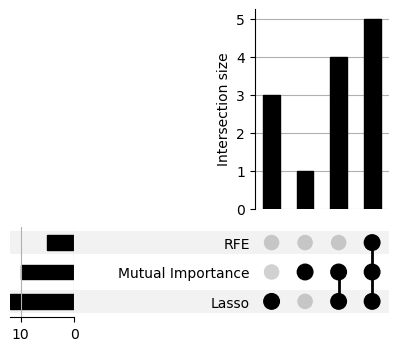

In [185]:
from upsetplot import UpSet
up_dict = UpSet(data, subset_size="count").plot()